# Naive Bayes on MNIST dataset
The first step is to download the handwritten image dataset. 

In [3]:
%pylab inline
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")

Populating the interactive namespace from numpy and matplotlib


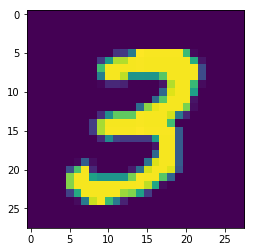

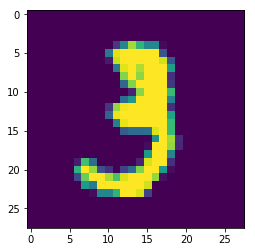

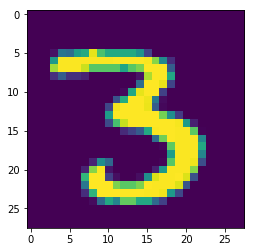

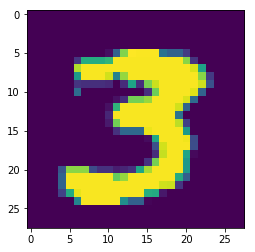

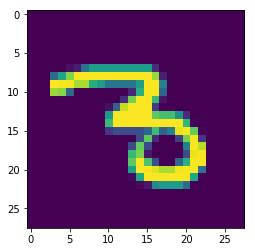

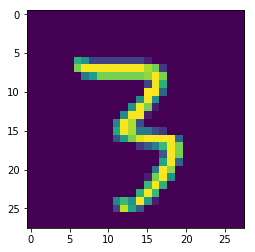

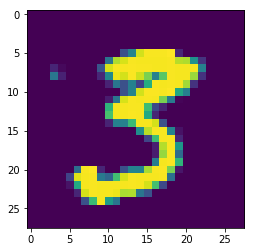

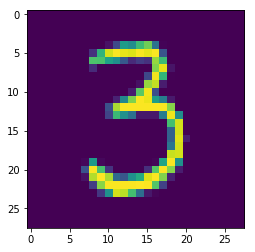

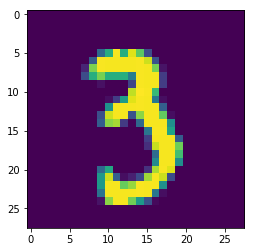

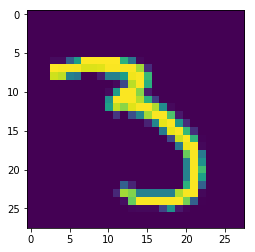

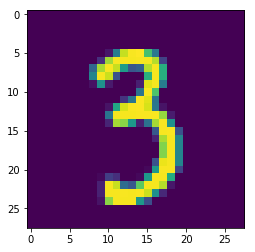

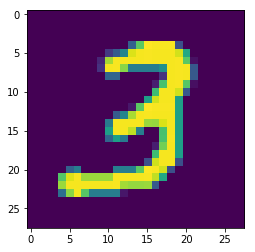

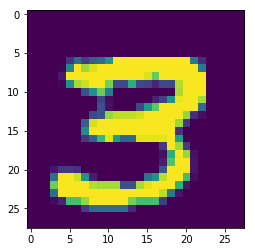

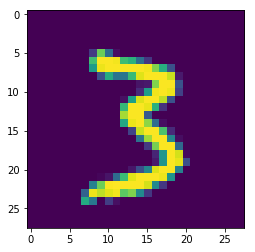

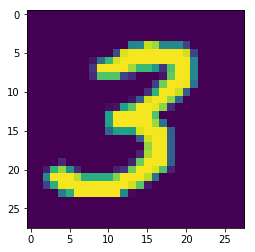

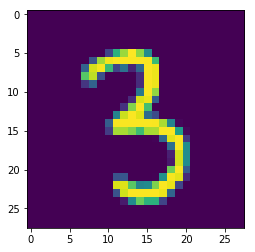

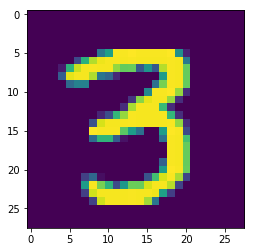

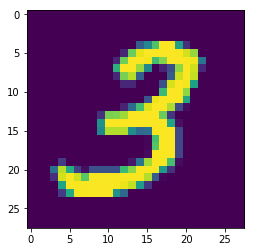

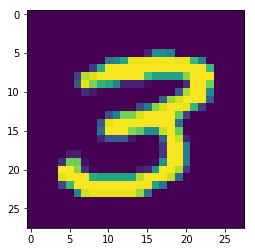

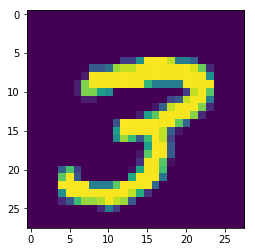

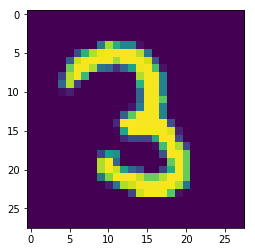

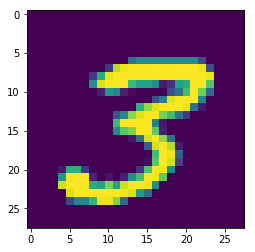

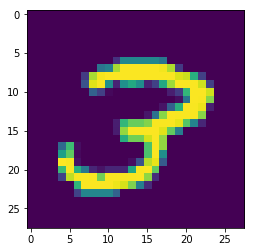

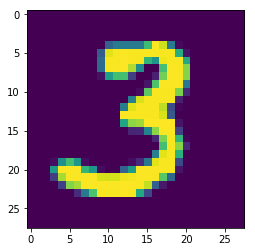

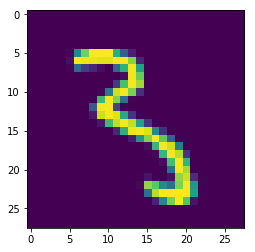

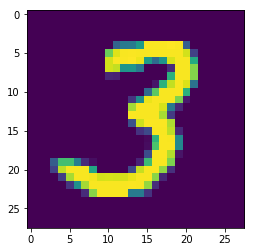

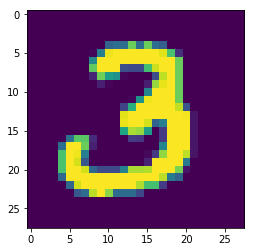

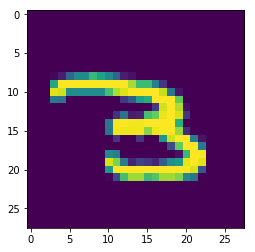

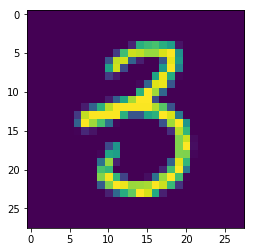

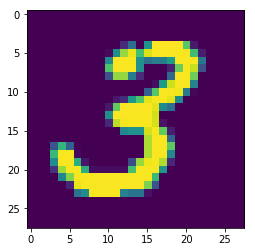

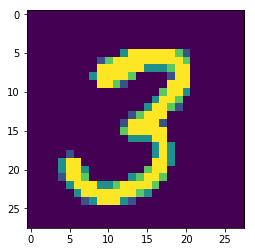

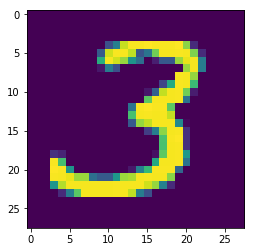

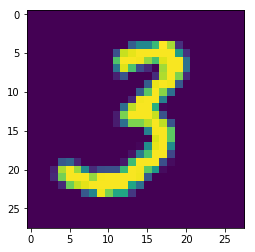

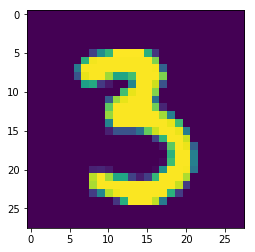

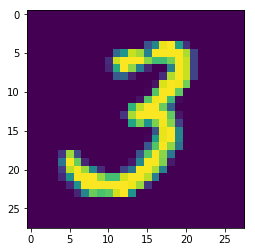

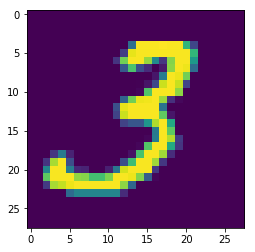

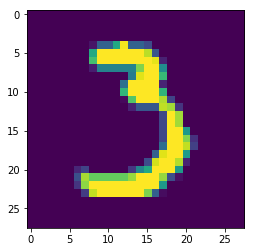

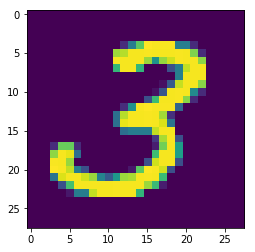

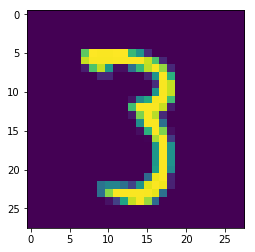

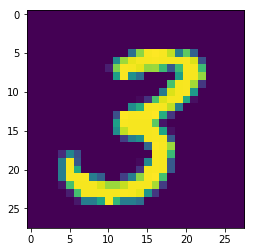

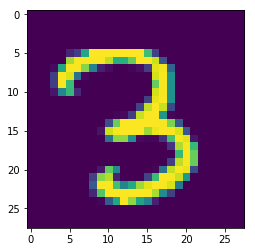

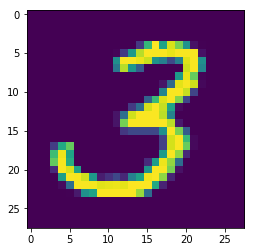

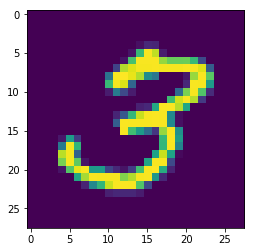

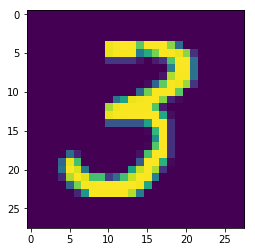

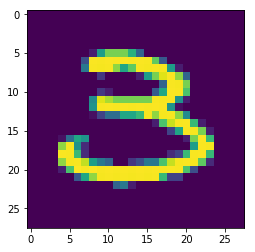

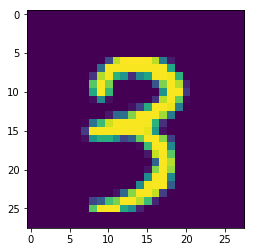

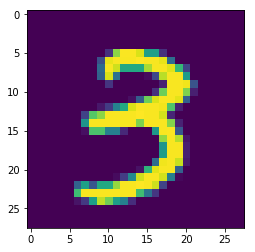

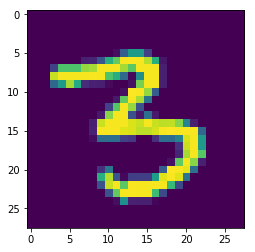

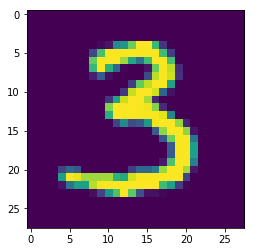

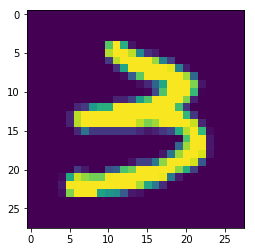

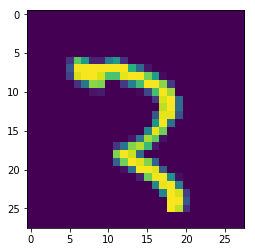

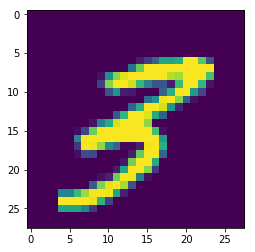

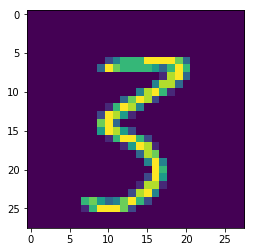

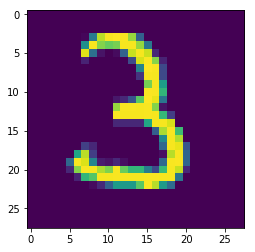

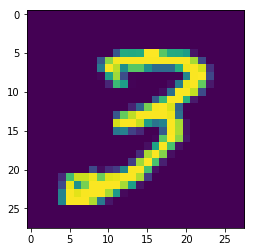

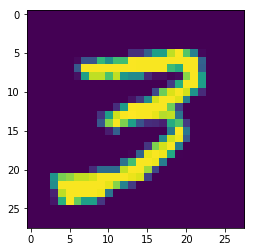

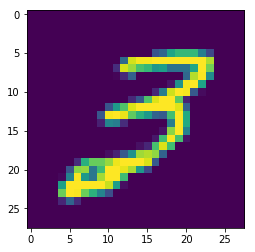

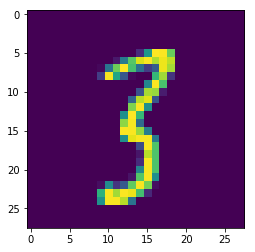

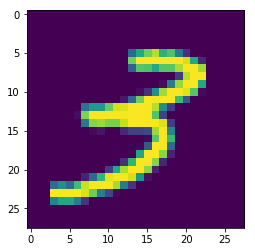

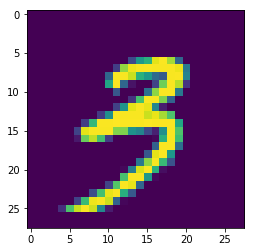

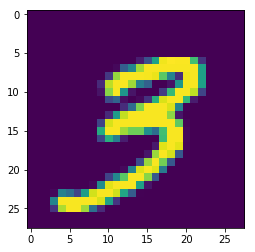

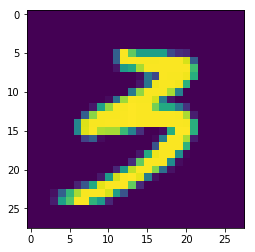

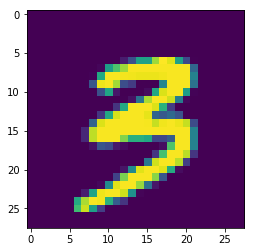

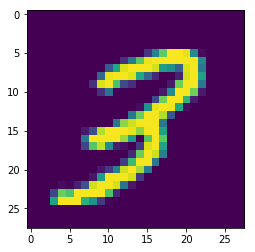

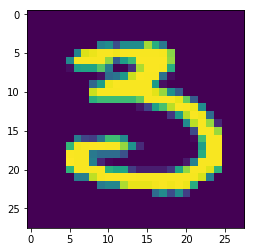

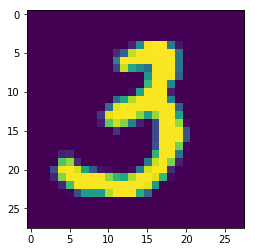

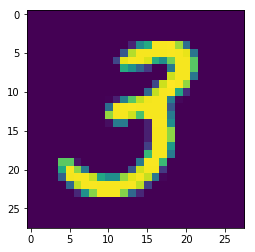

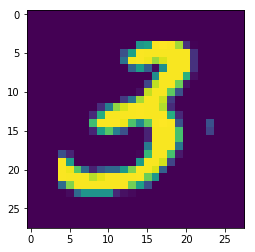

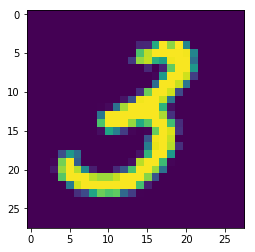

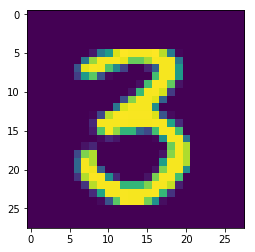

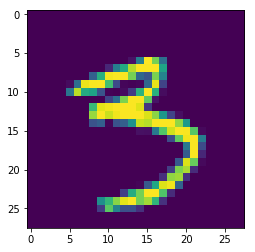

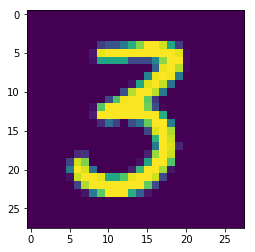

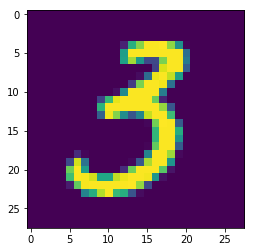

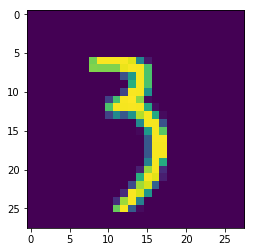

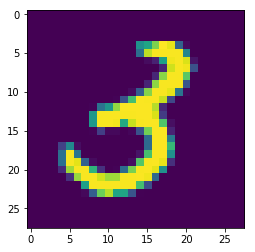

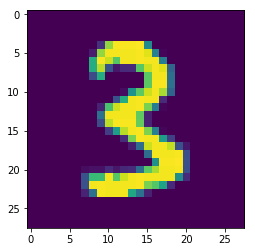

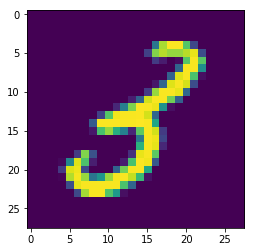

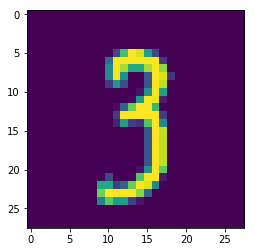

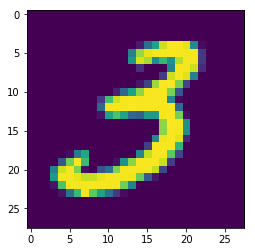

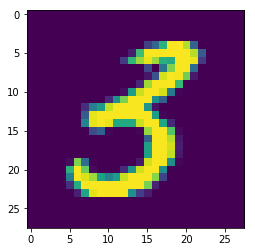

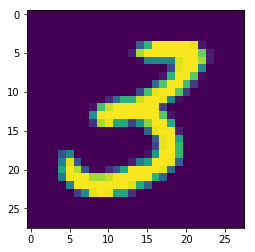

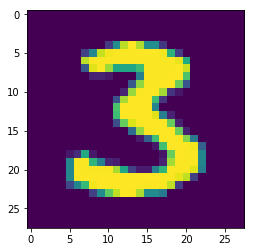

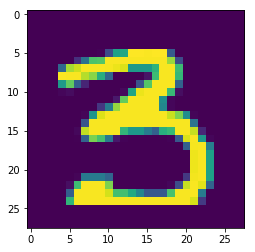

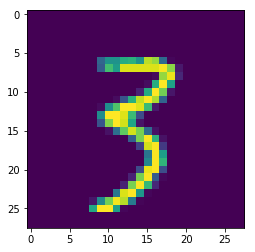

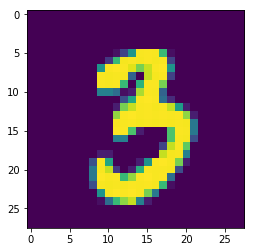

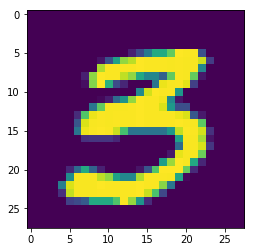

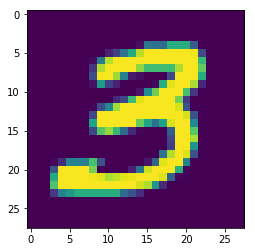

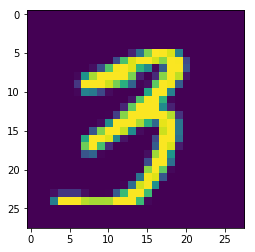

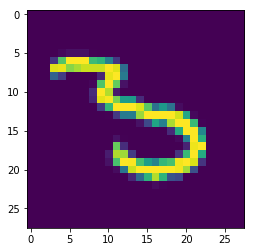

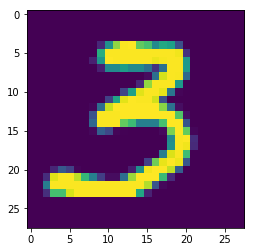

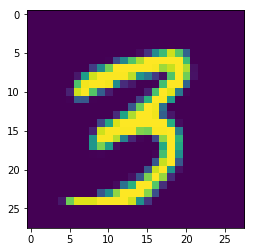

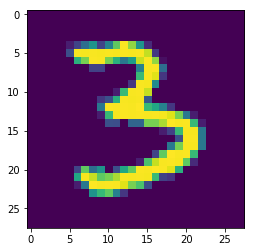

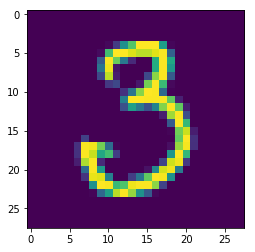

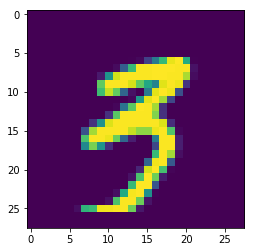

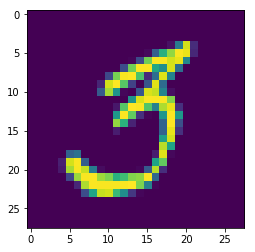

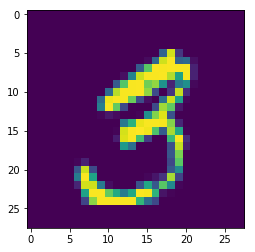

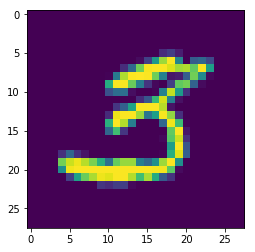

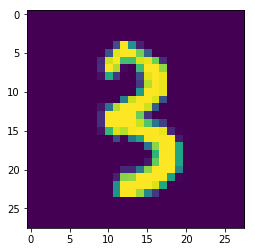

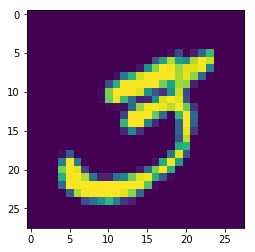

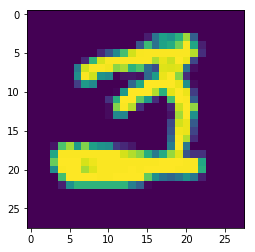

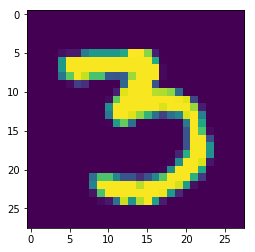

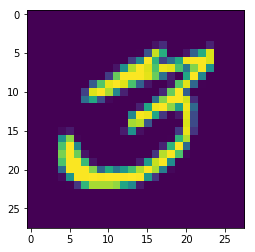

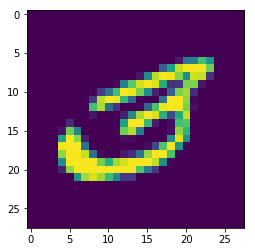

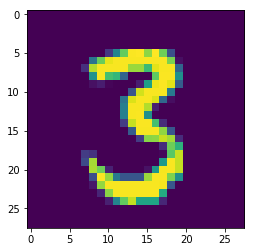

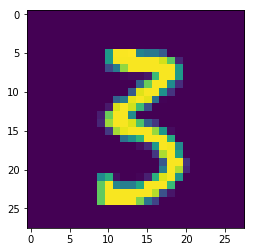

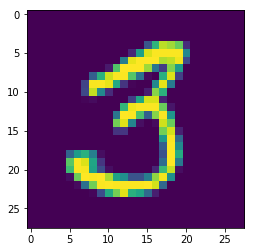

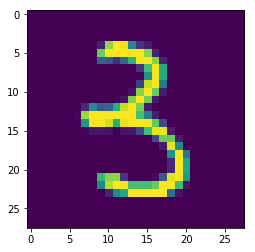

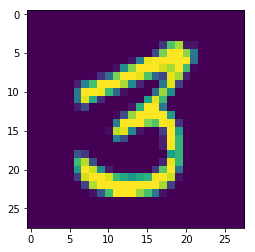

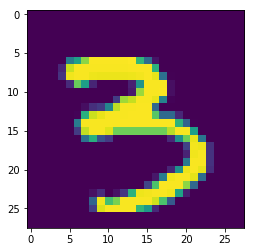

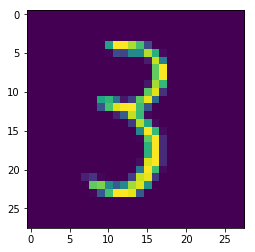

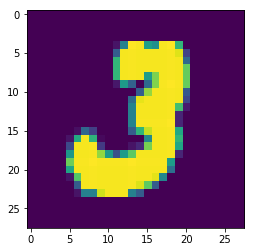

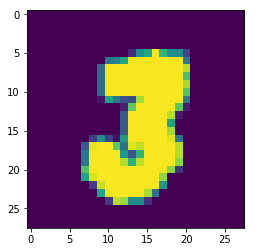

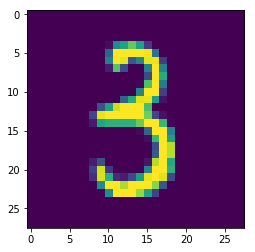

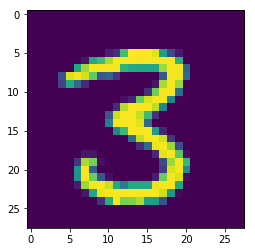

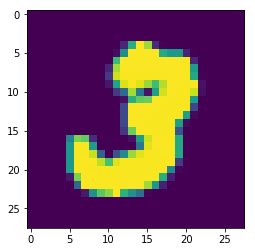

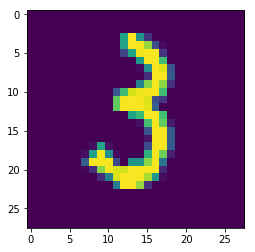

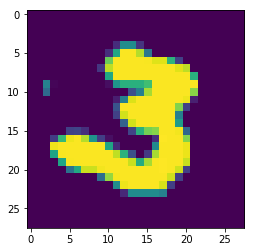

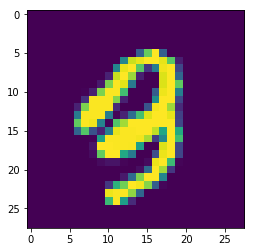

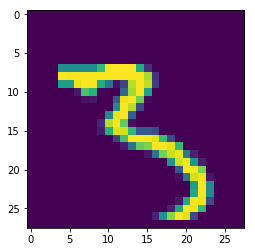

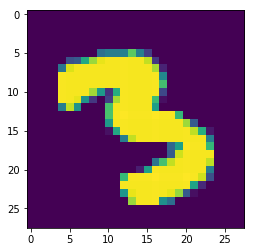

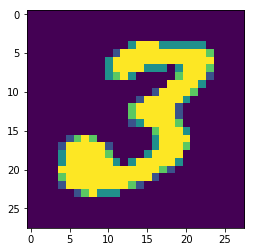

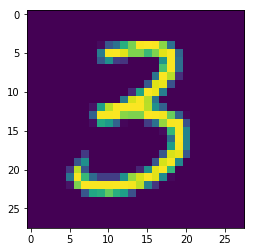

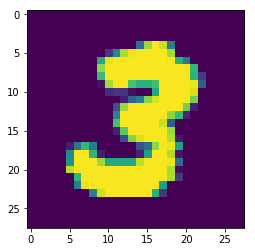

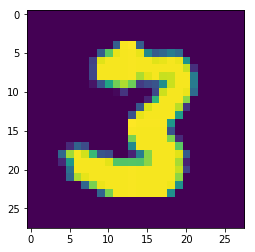

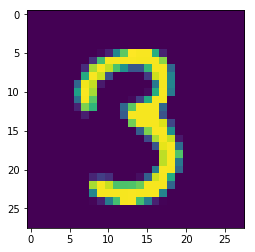

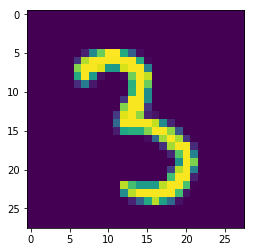

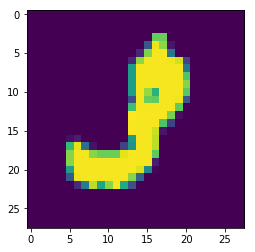

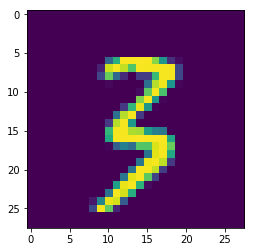

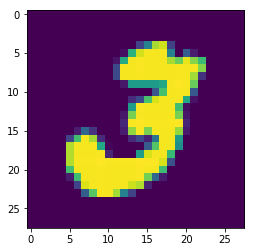

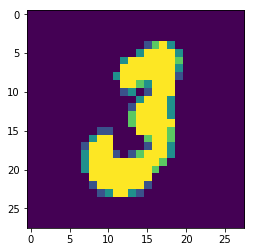

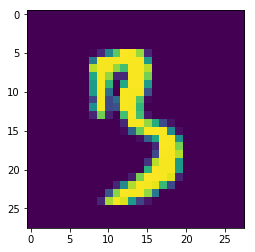

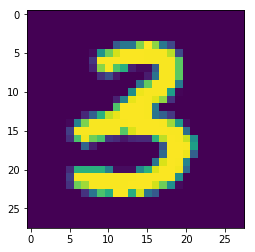

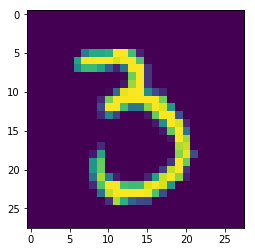

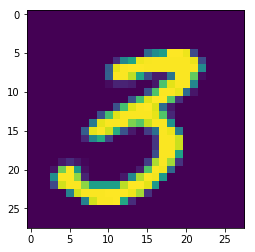

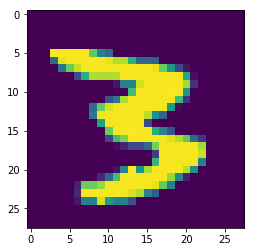

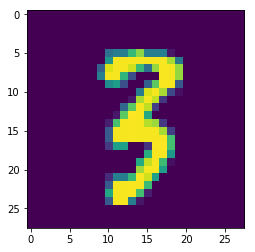

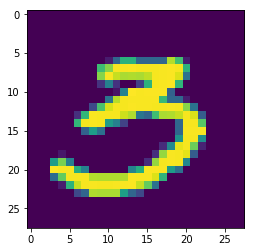

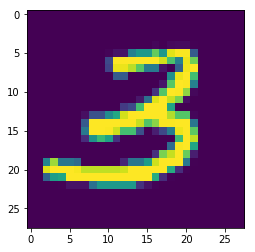

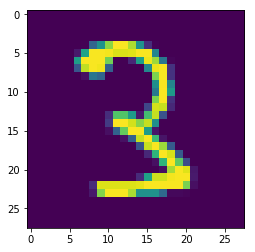

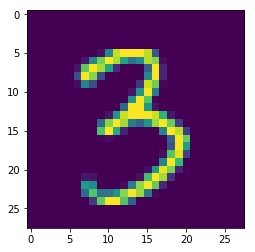

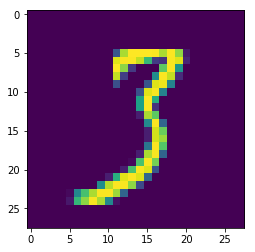

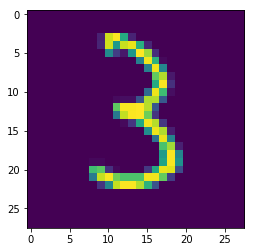

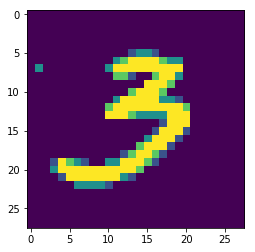

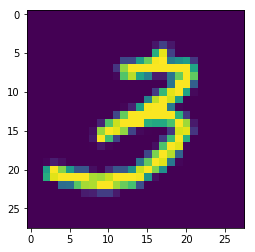

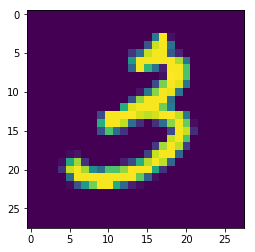

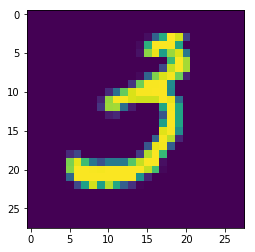

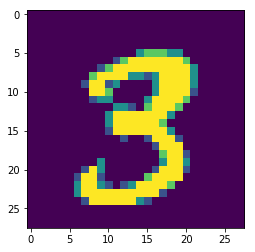

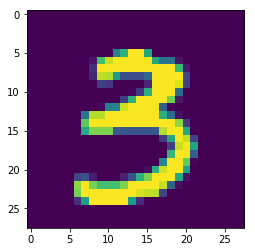

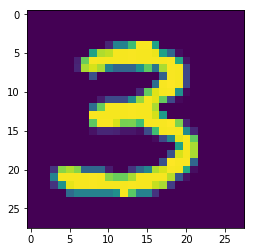

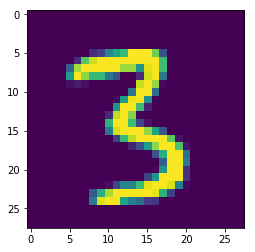

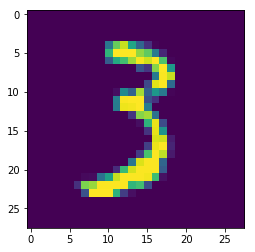

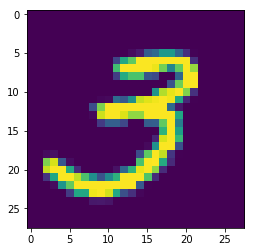

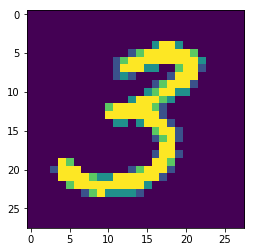

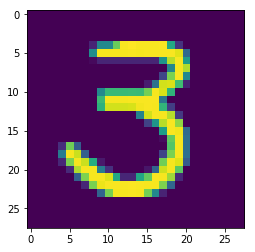

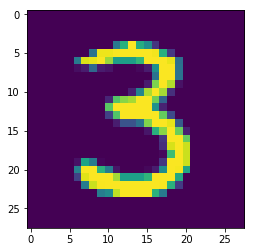

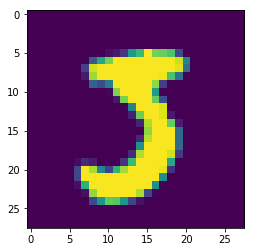

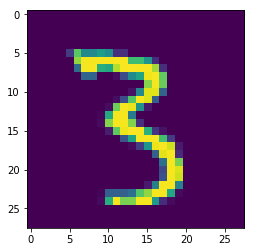

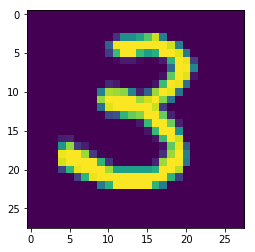

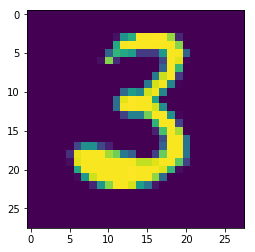

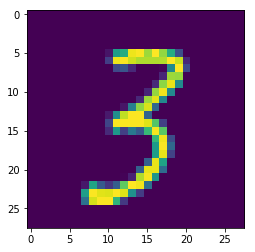

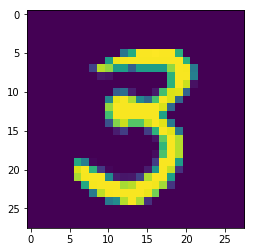

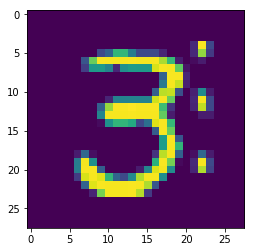

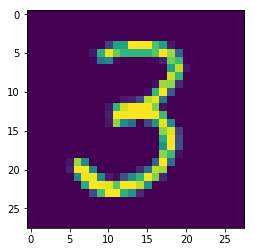

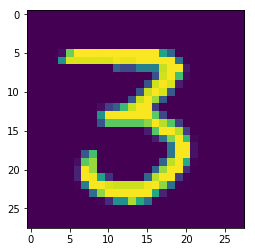

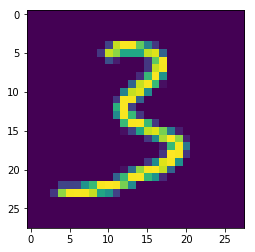

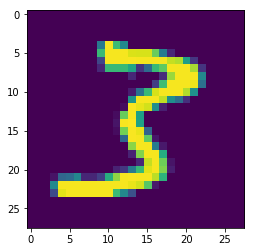

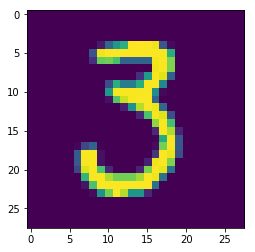

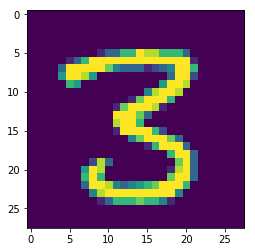

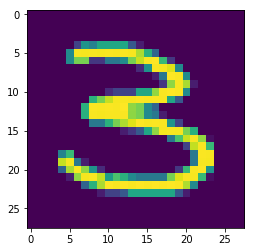

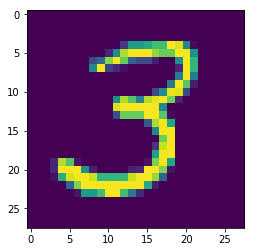

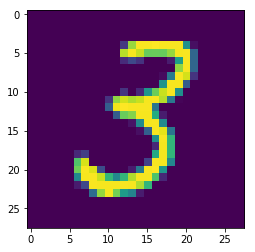

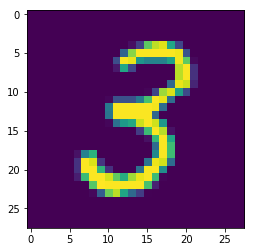

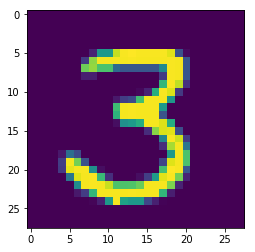

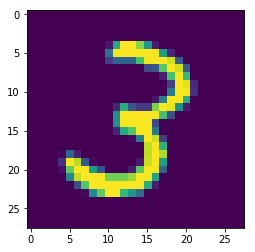

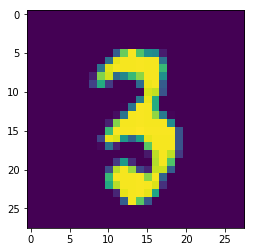

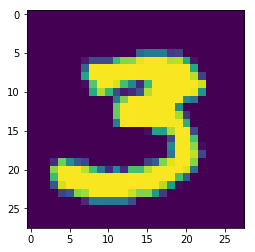

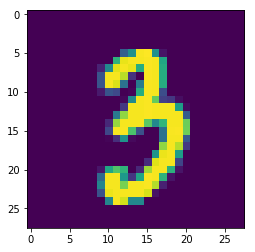

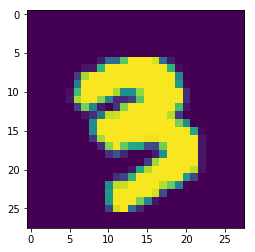

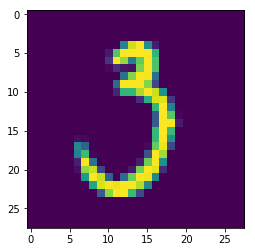

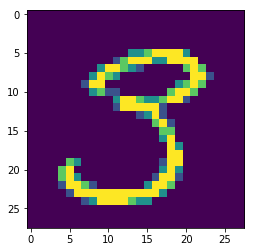

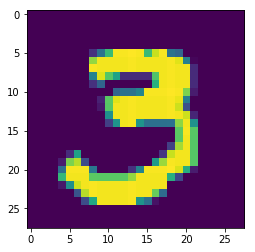

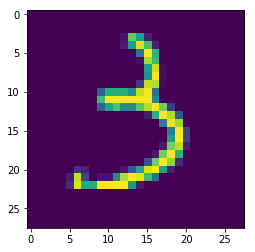

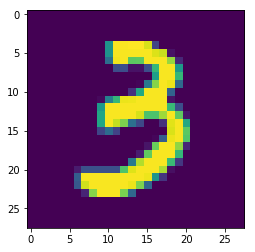

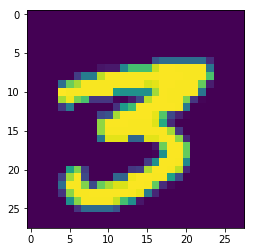

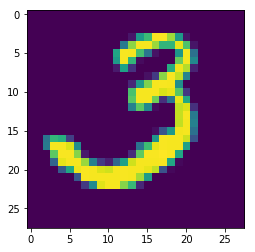

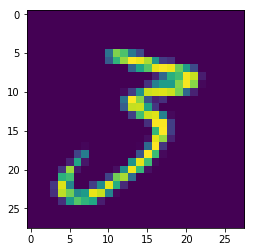

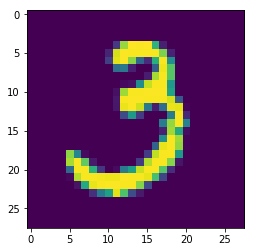

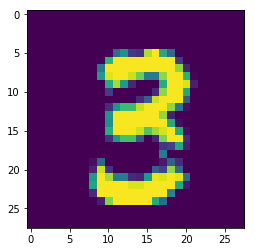

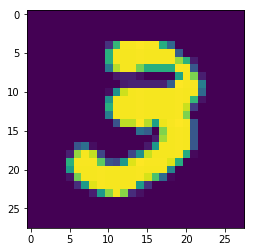

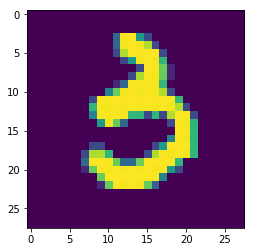

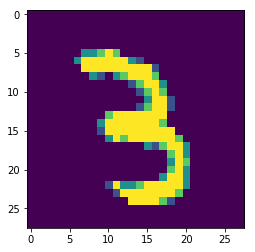

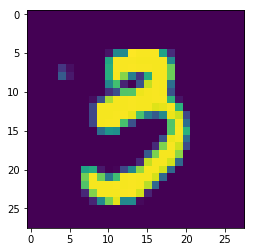

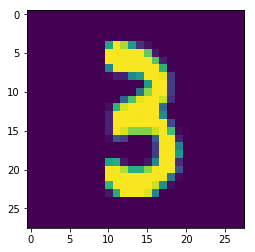

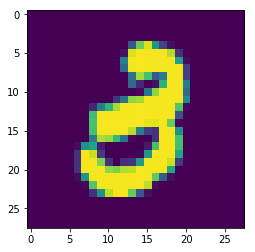

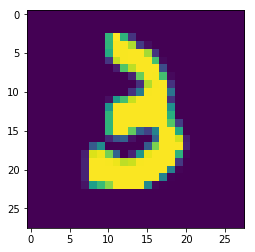

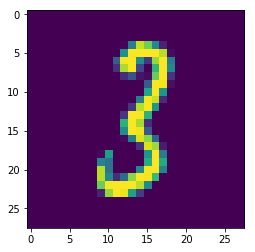

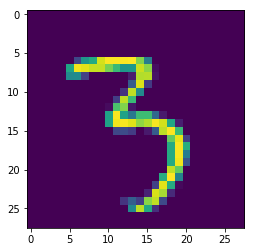

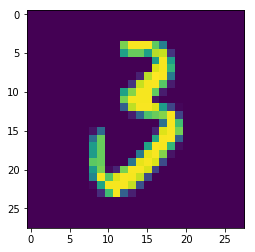

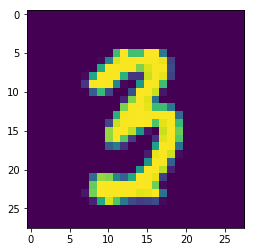

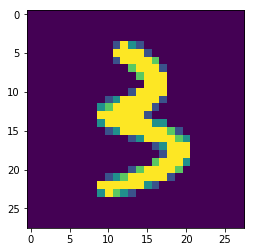

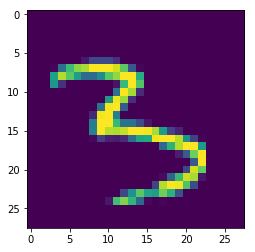

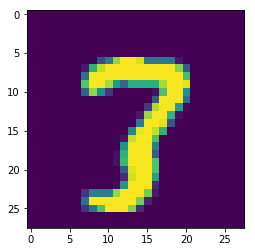

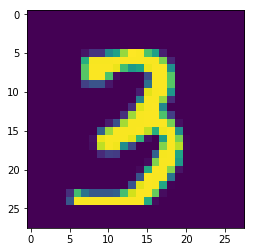

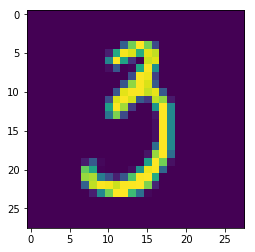

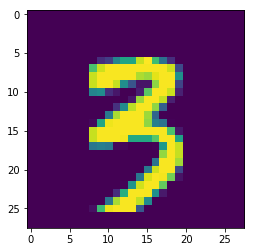

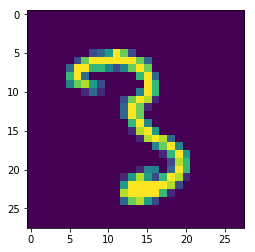

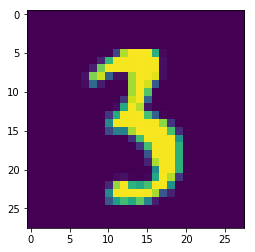

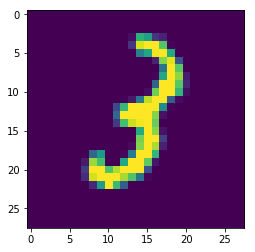

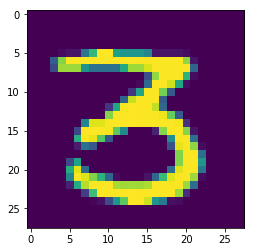

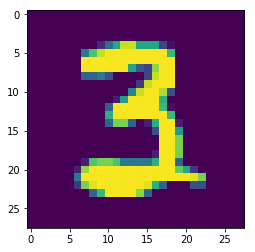

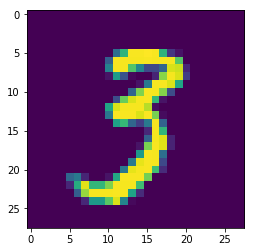

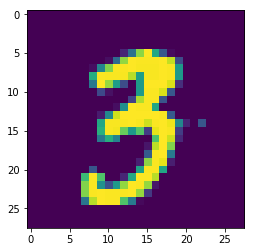

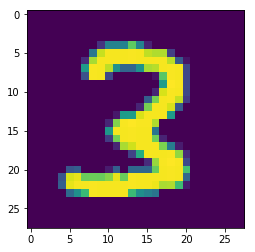

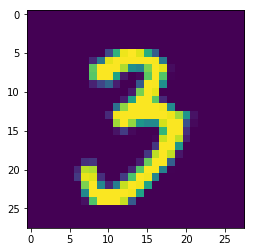

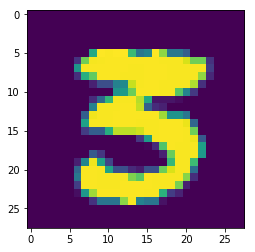

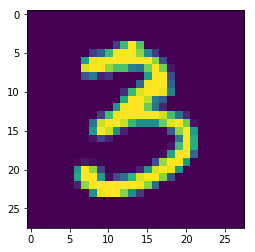

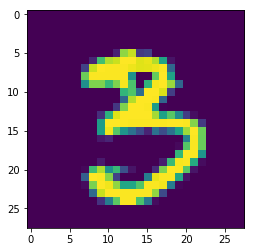

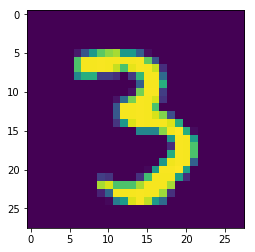

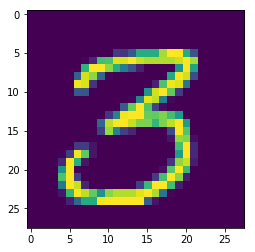

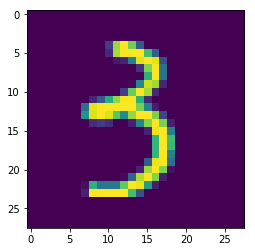

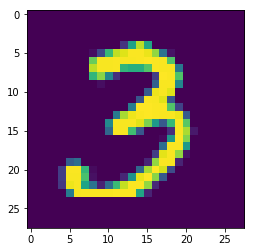

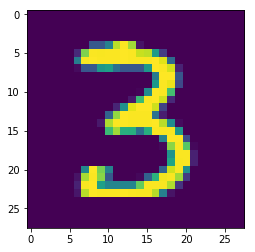

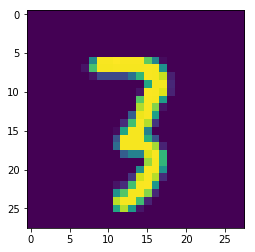

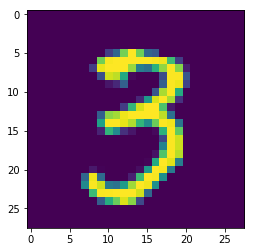

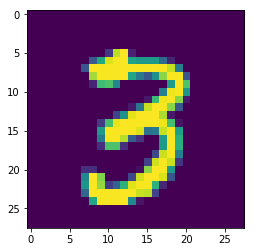

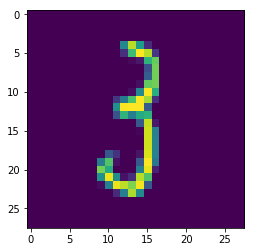

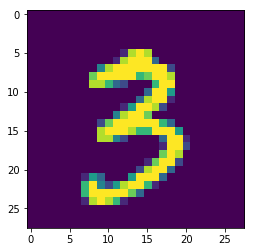

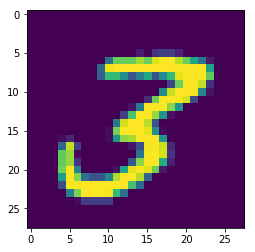

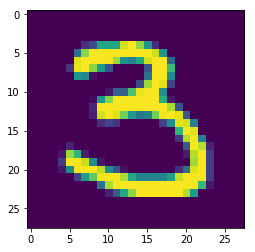

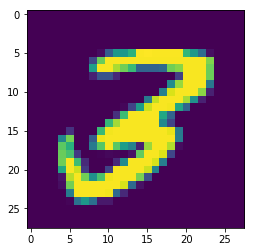

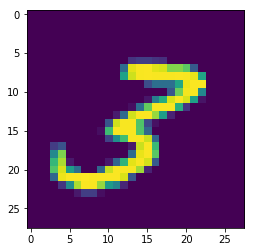

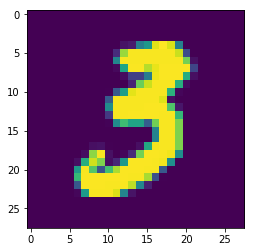

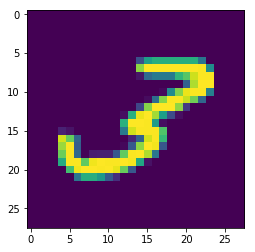

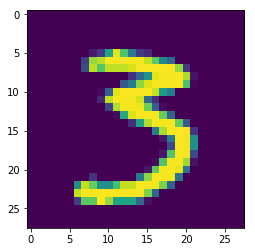

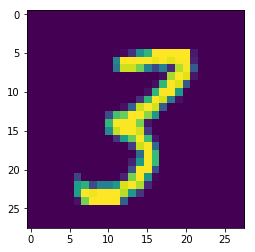

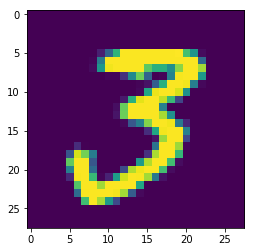

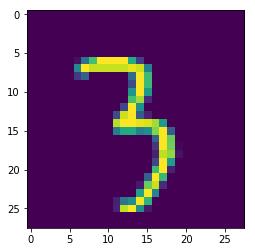

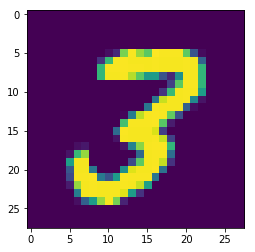

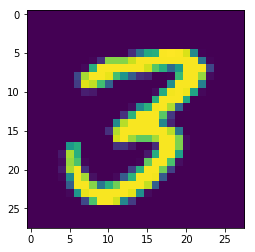

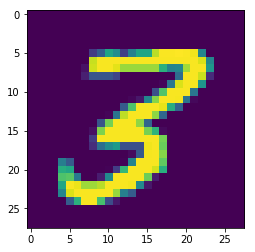

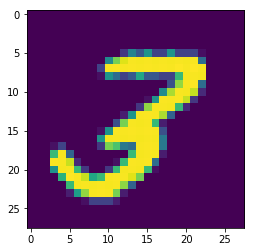

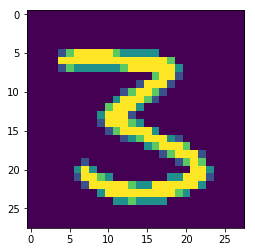

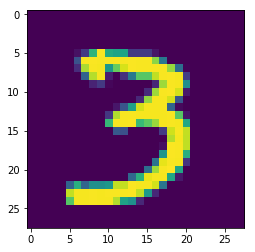

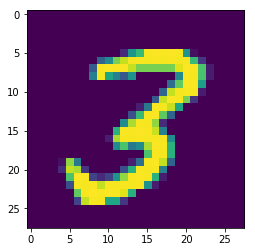

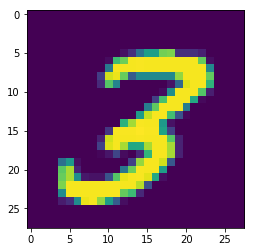

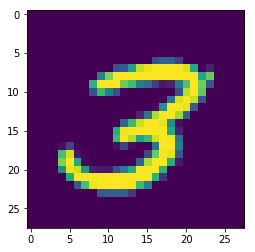

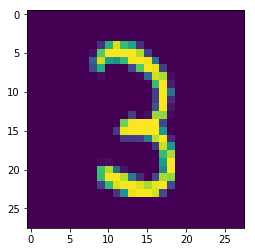

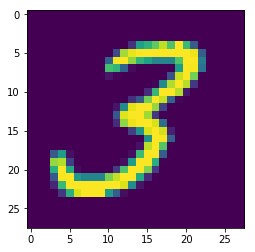

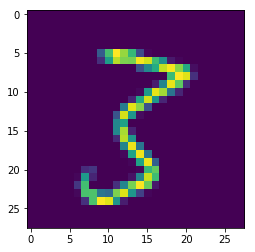

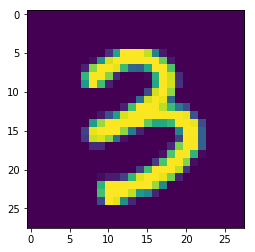

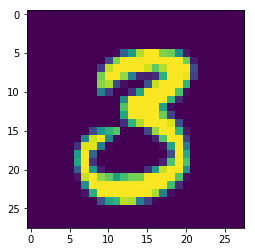

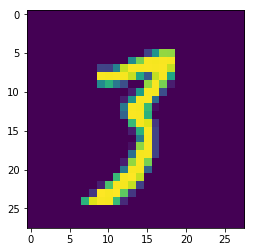

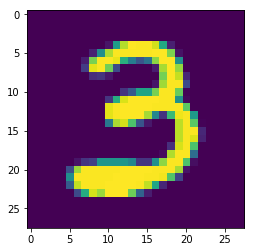

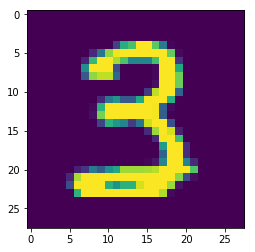

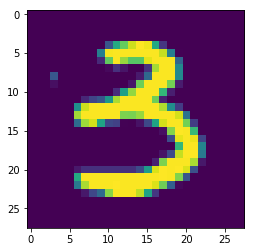

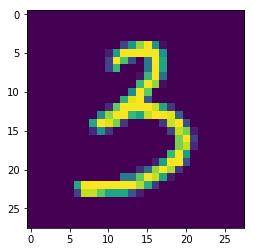

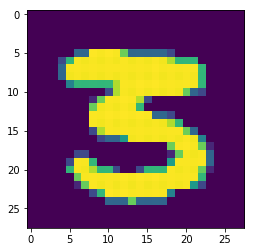

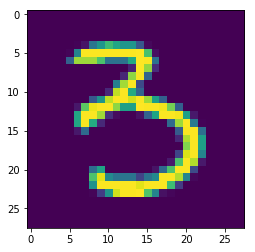

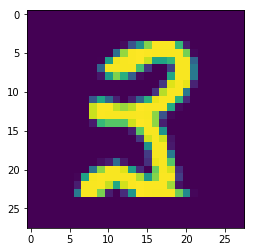

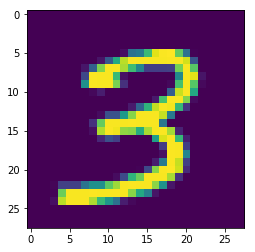

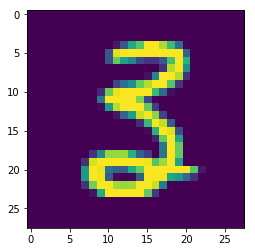

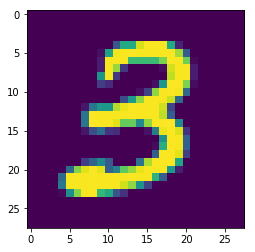

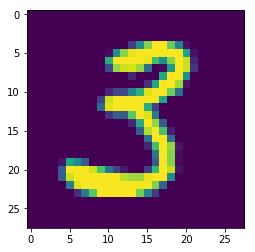

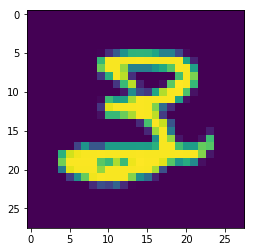

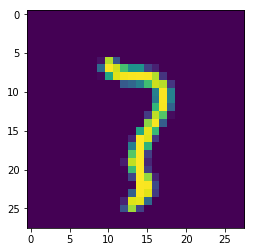

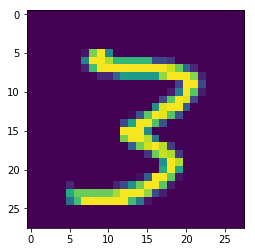

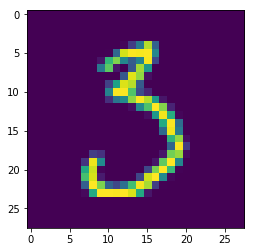

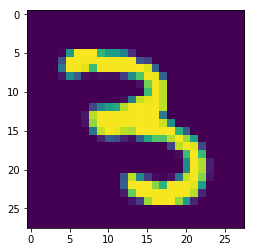

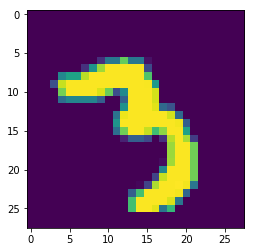

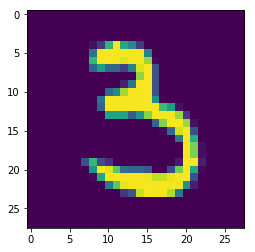

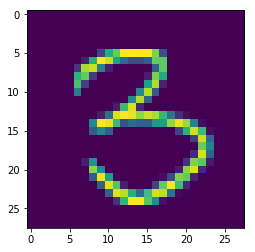

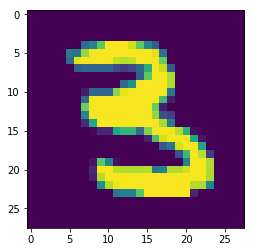

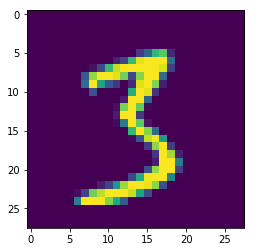

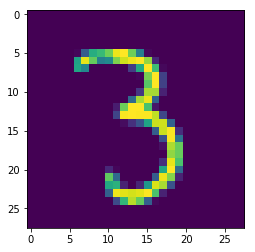

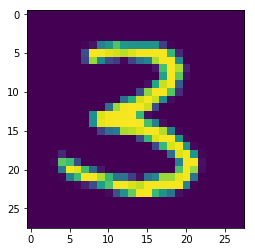

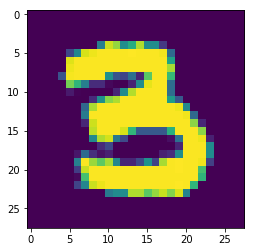

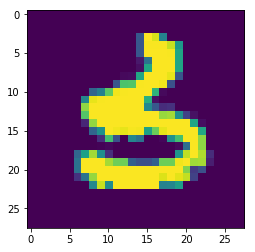

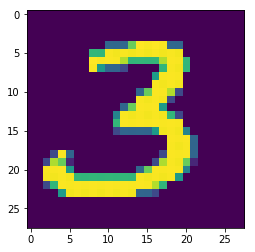

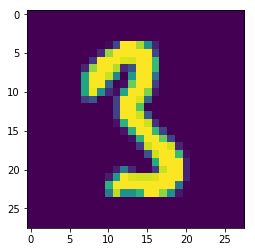

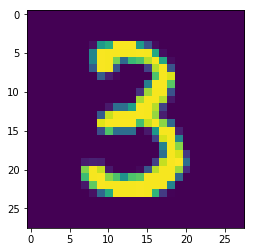

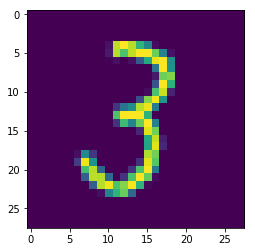

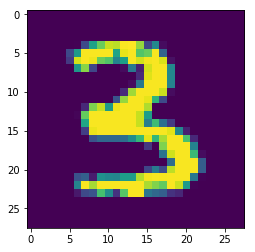

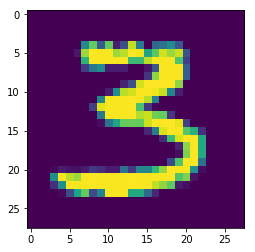

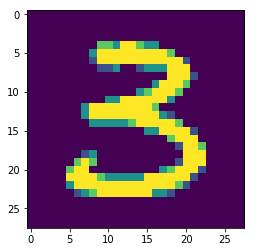

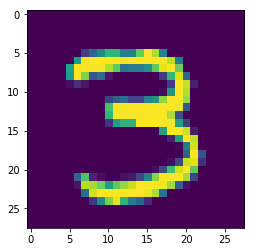

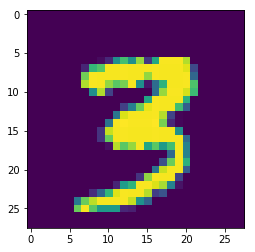

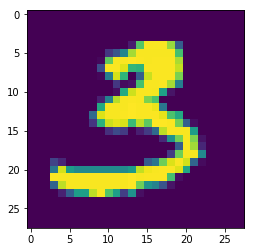

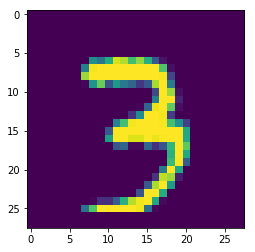

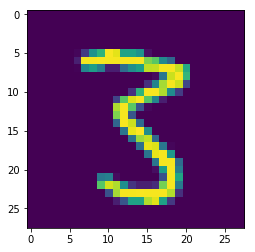

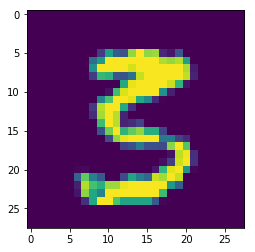

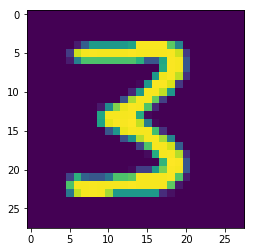

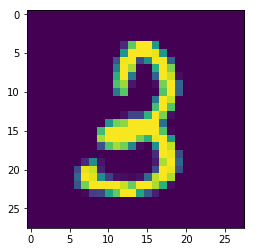

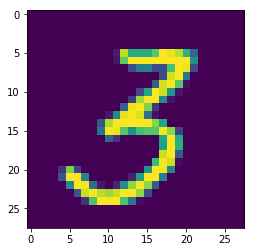

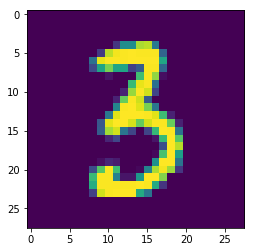

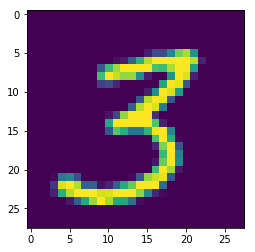

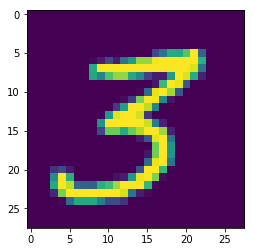

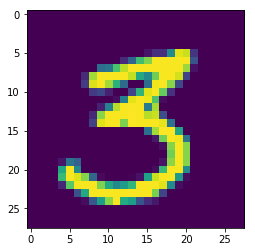

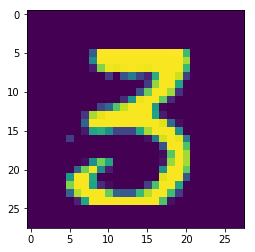

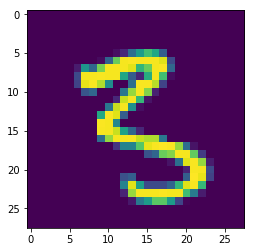

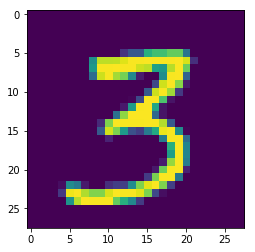

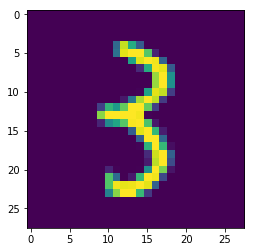

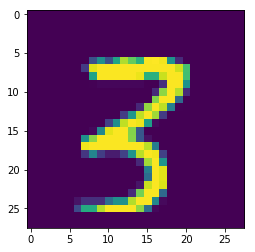

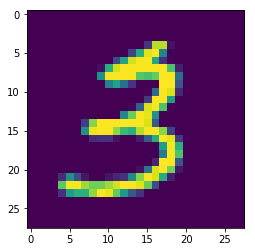

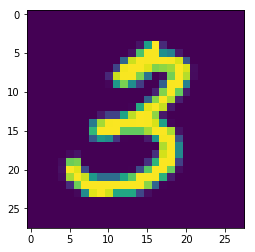

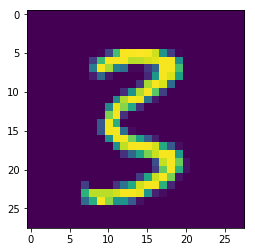

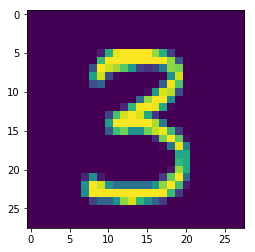

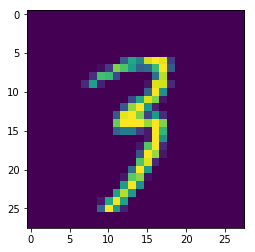

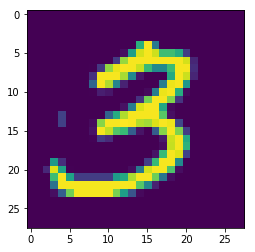

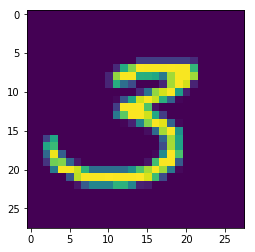

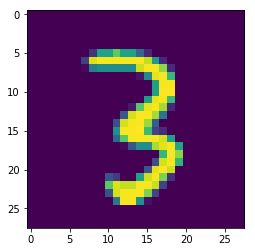

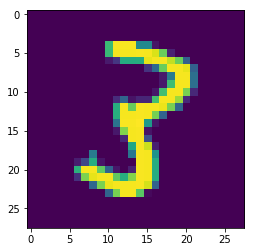

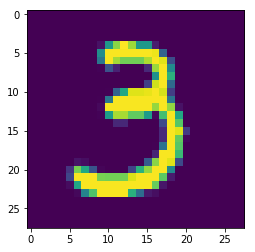

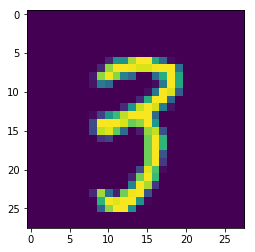

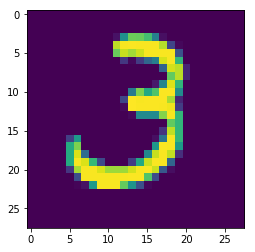

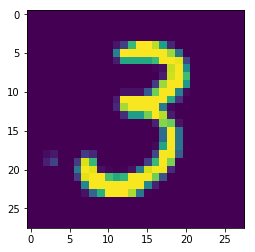

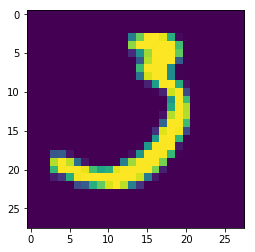

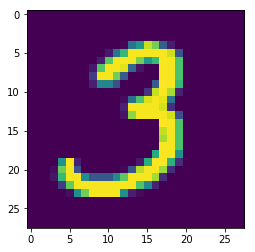

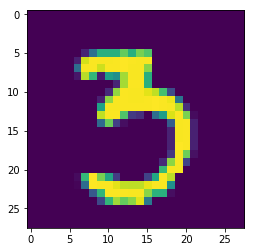

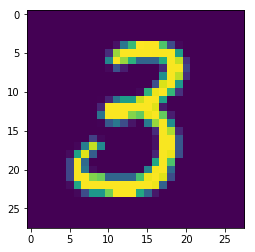

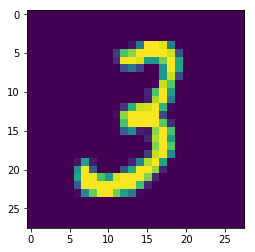

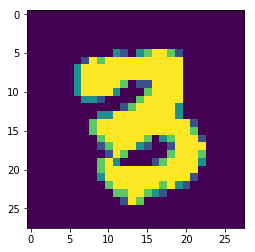

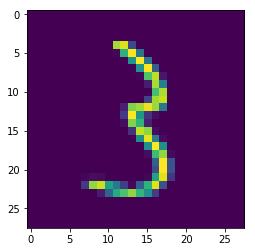

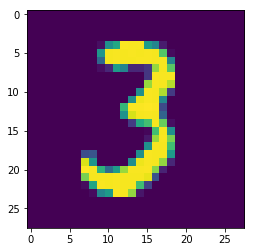

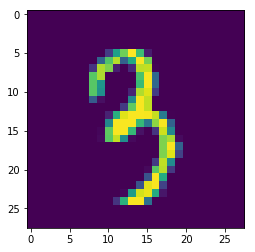

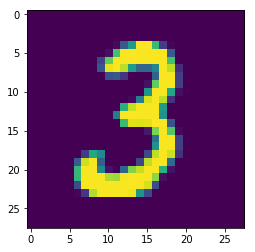

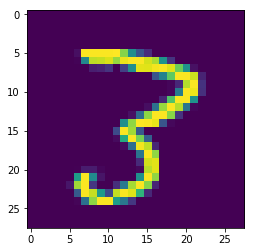

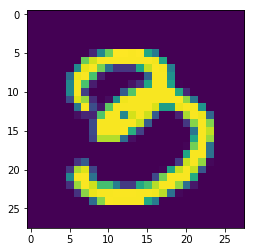

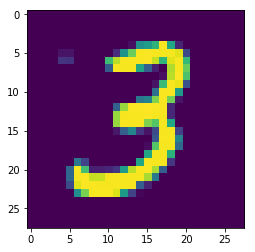

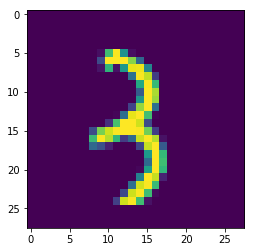

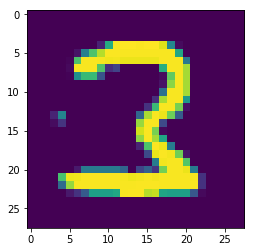

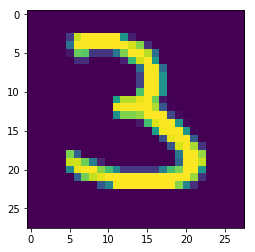

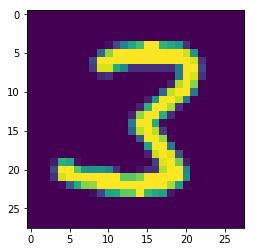

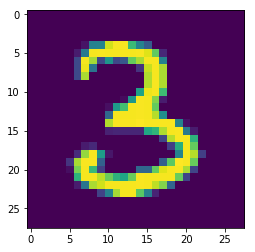

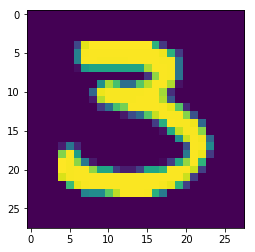

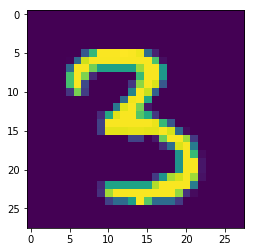

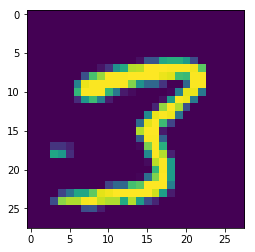

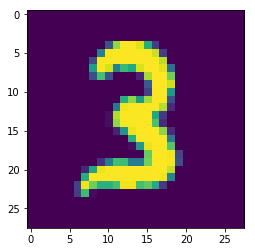

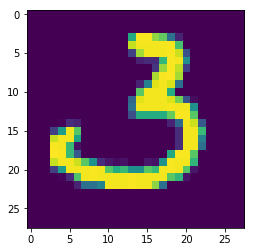

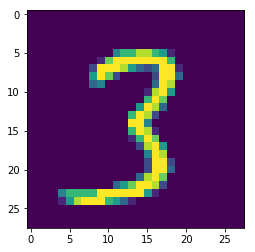

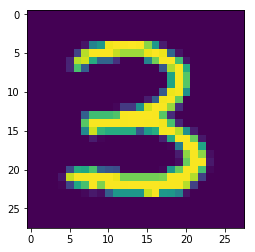

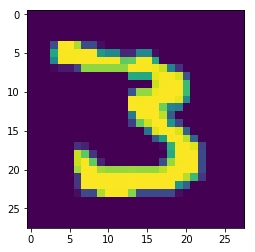

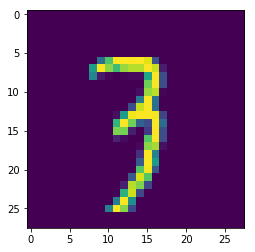

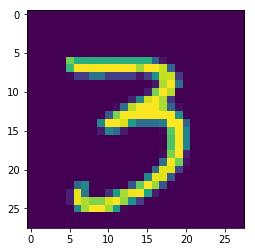

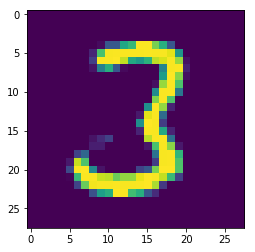

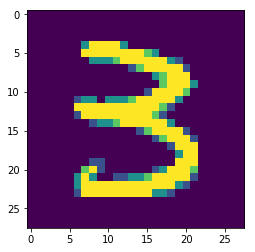

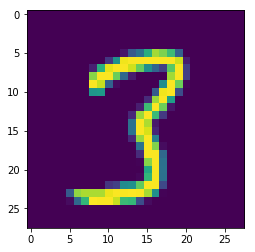

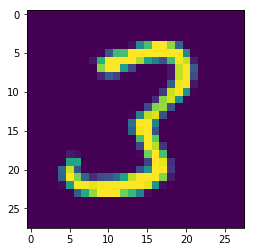

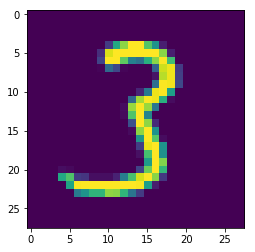

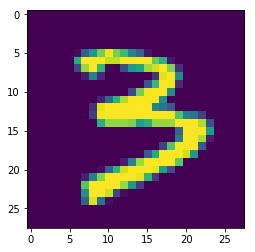

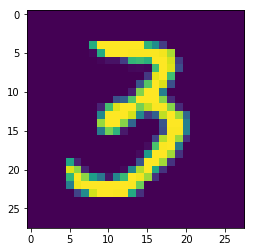

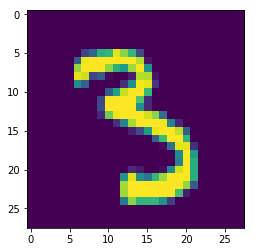

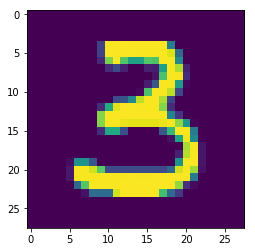

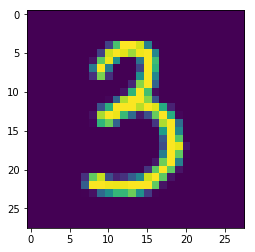

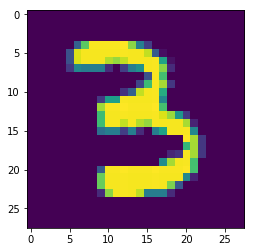

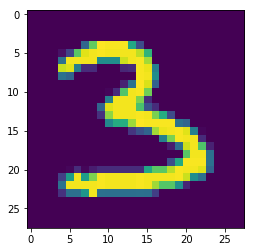

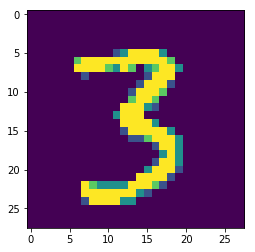

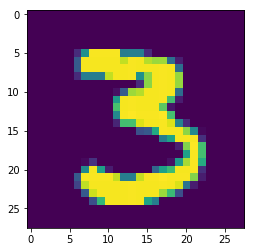

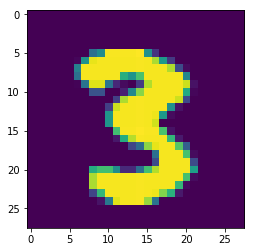

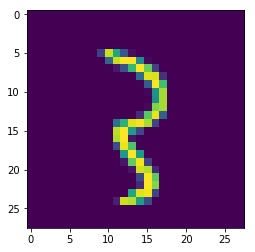

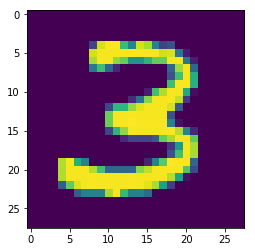

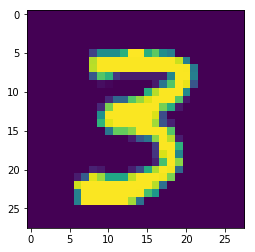

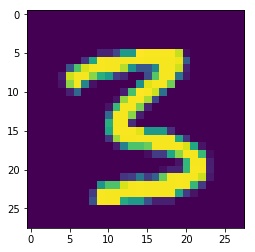

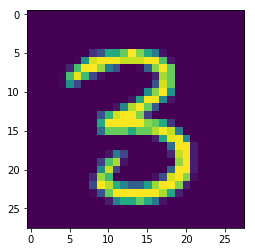

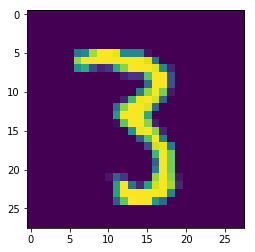

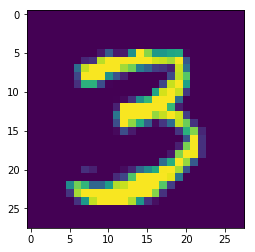

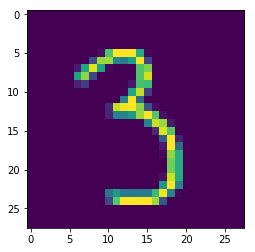

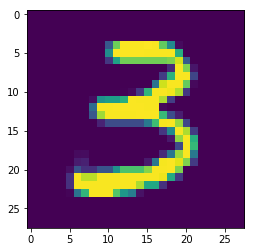

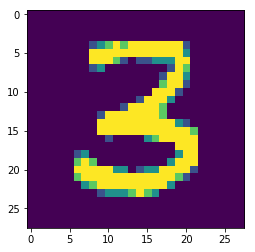

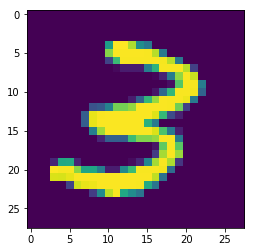

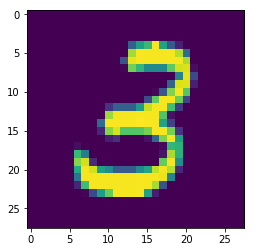

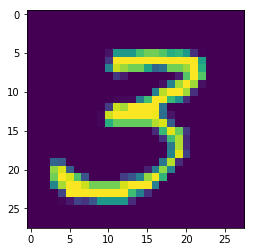

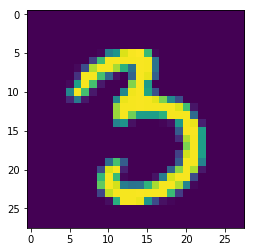

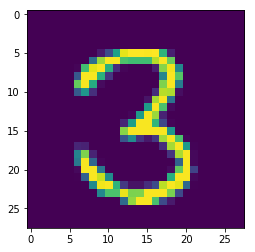

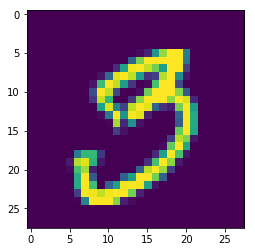

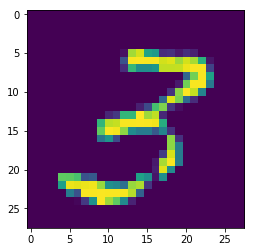

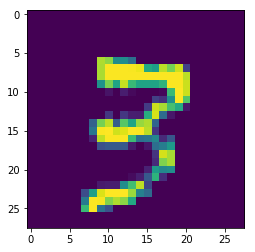

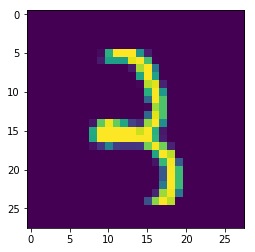

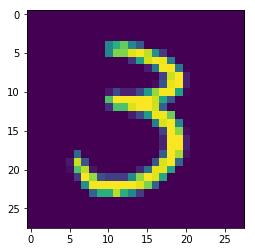

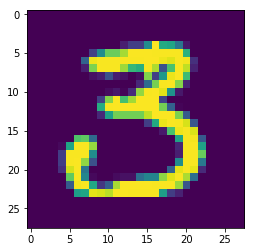

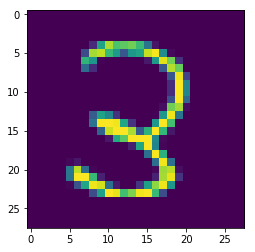

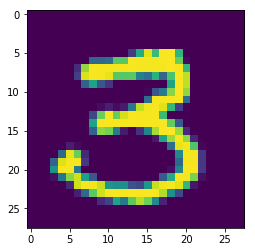

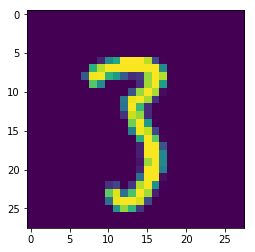

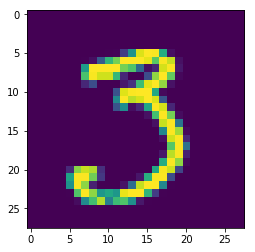

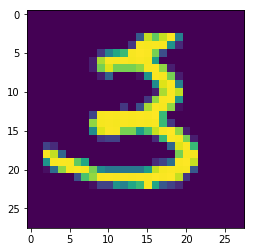

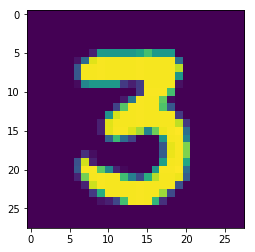

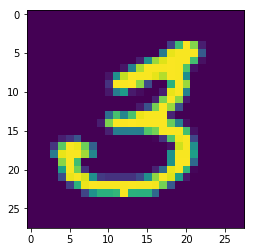

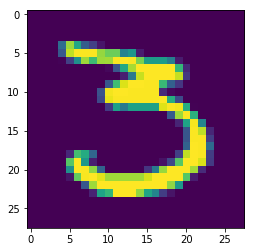

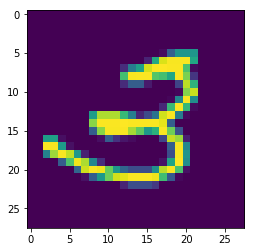

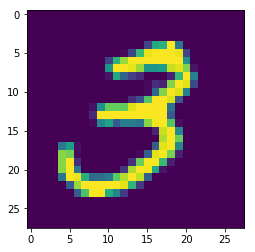

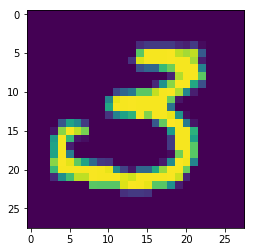

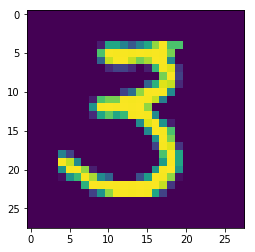

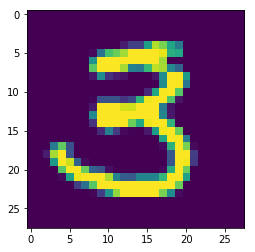

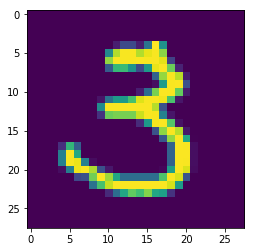

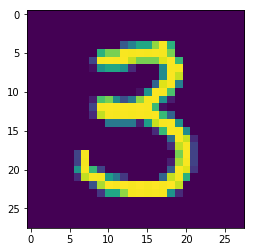

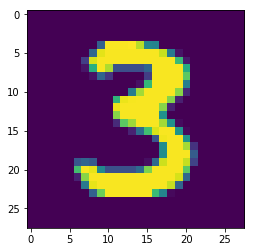

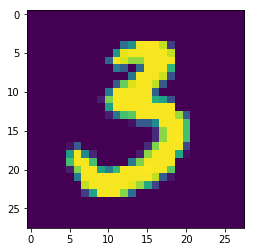

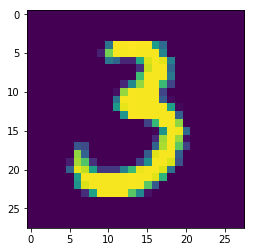

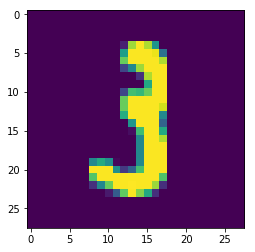

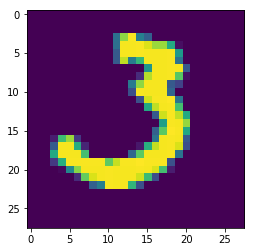

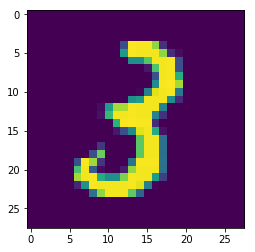

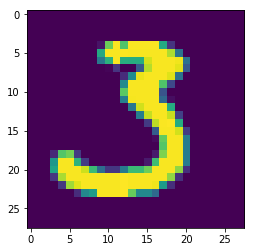

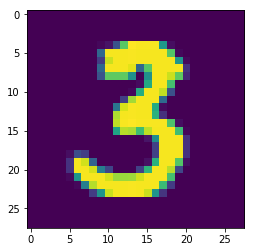

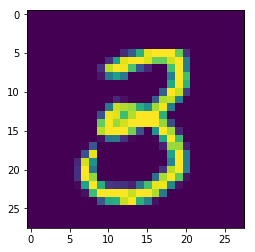

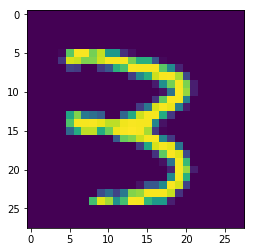

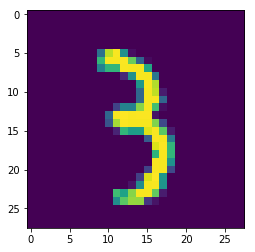

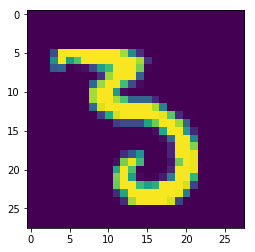

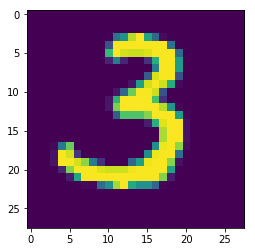

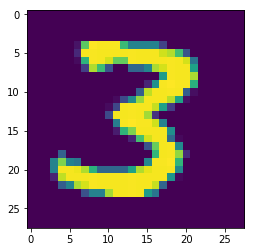

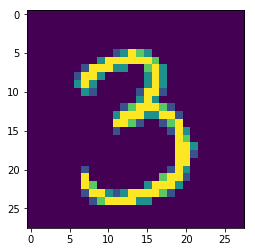

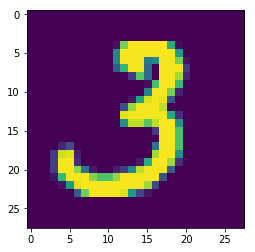

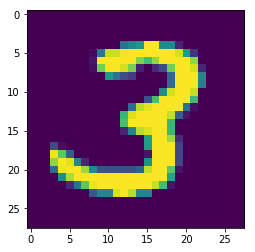

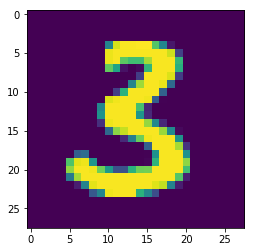

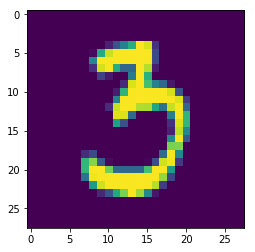

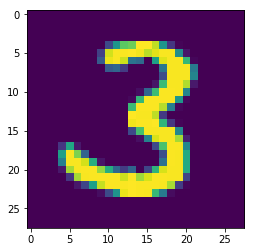

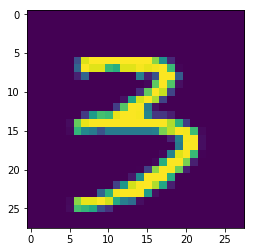

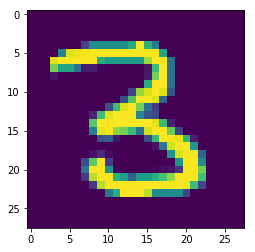

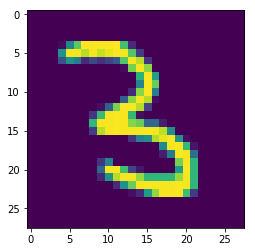

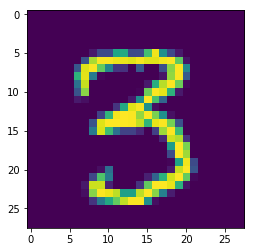

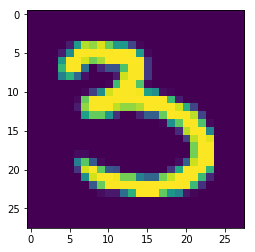

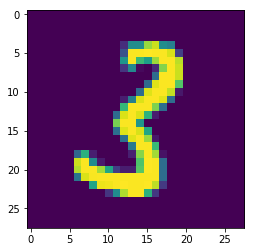

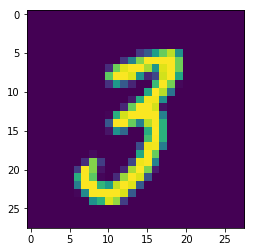

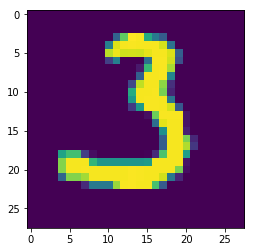

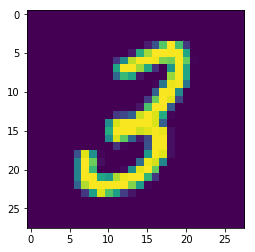

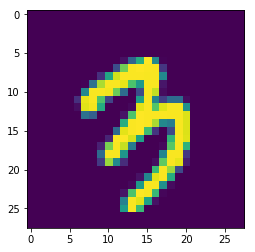

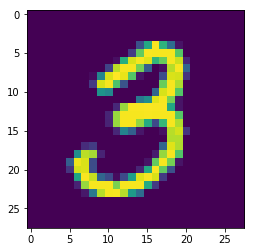

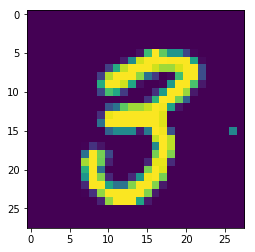

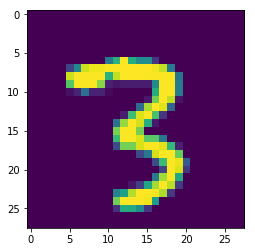

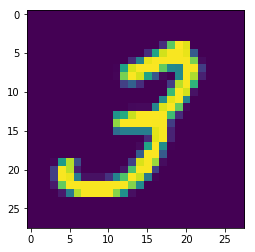

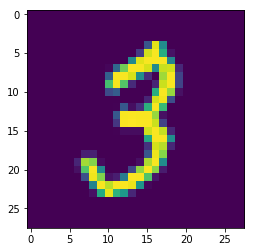

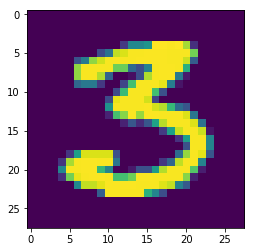

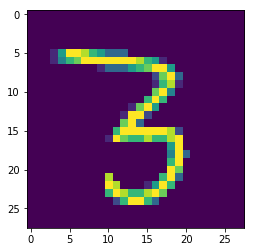

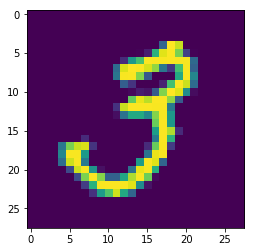

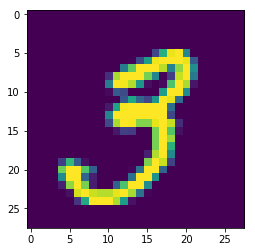

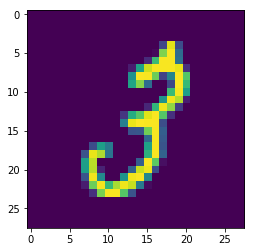

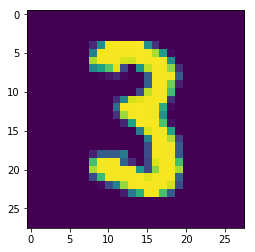

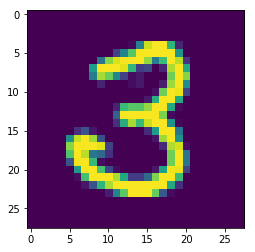

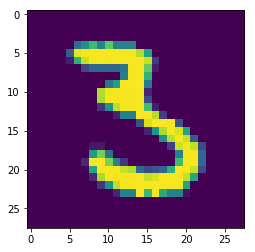

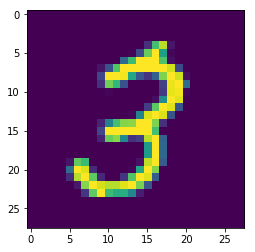

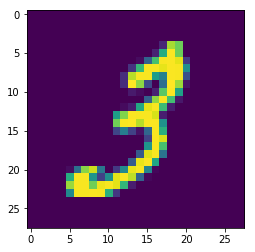

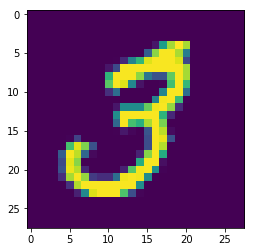

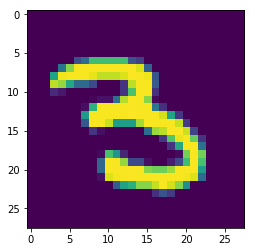

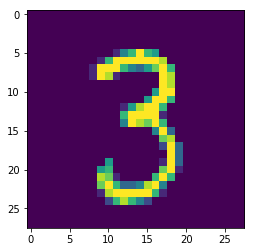

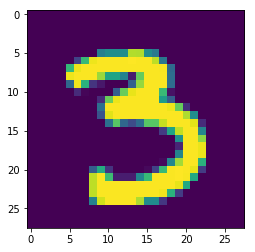

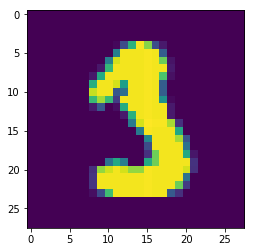

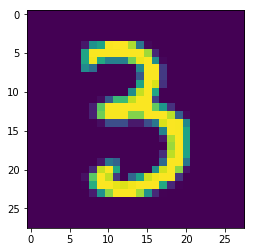

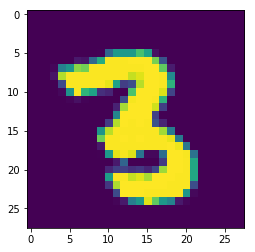

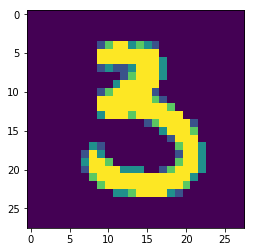

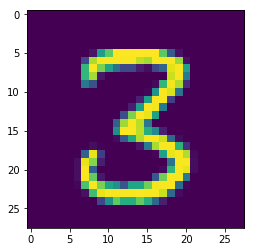

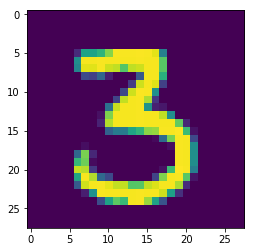

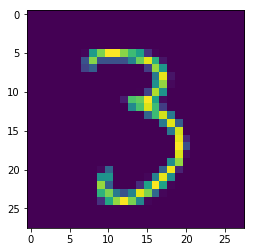

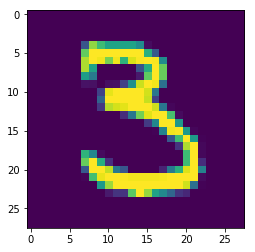

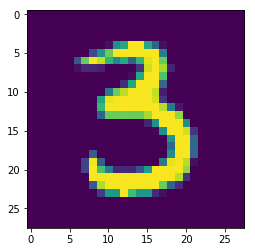

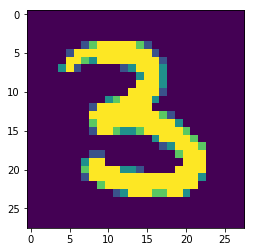

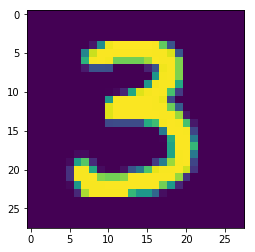

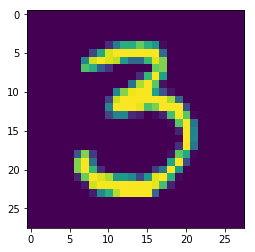

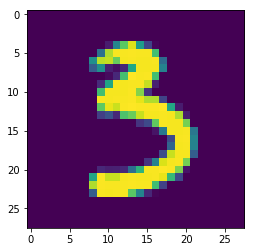

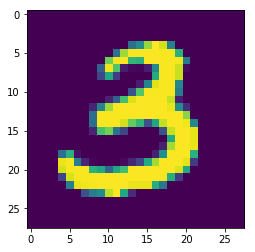

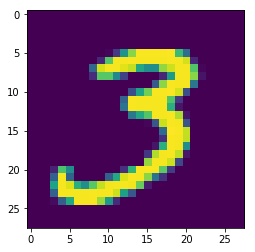

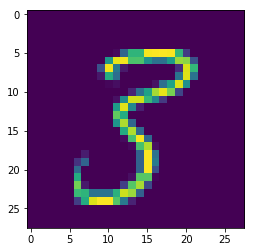

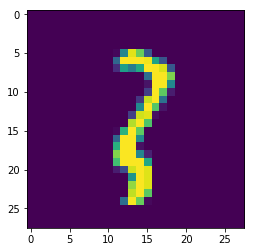

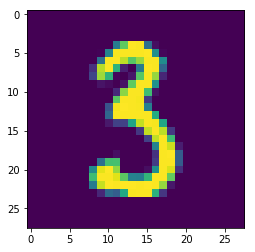

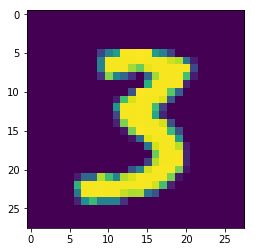

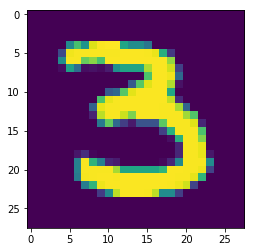

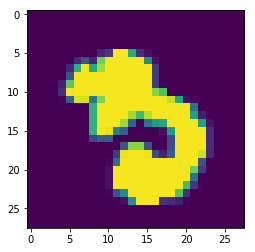

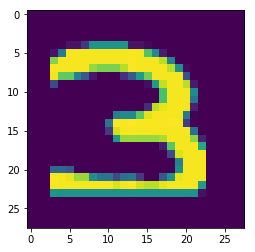

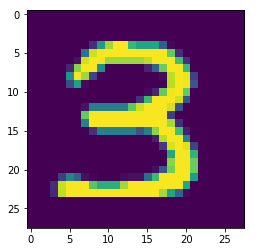

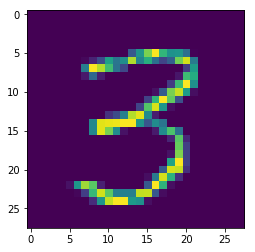

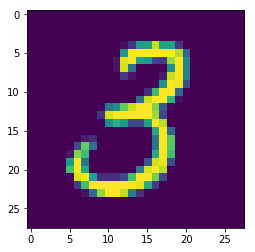

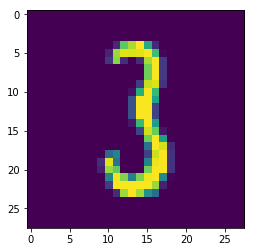

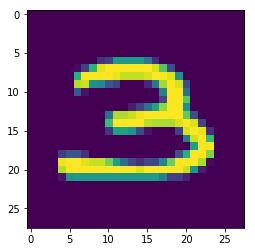

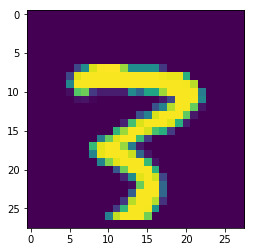

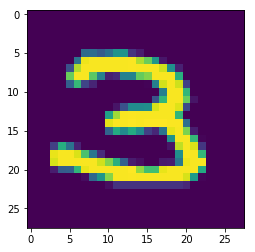

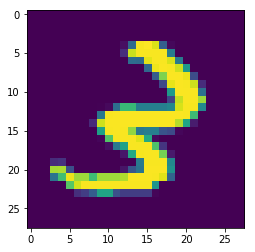

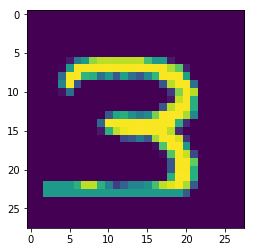

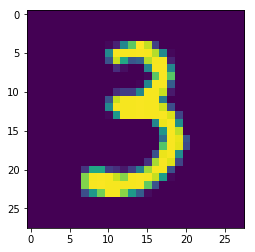

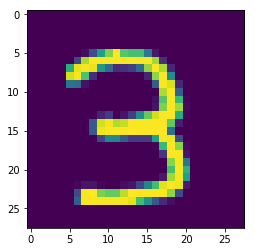

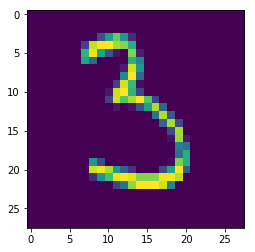

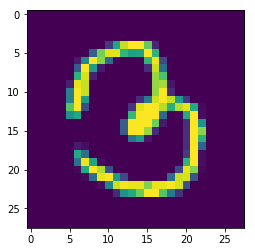

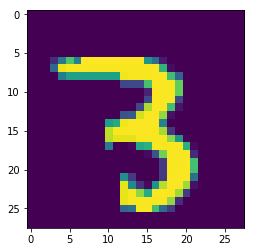

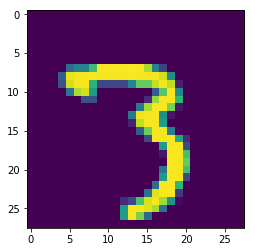

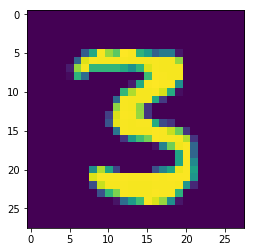

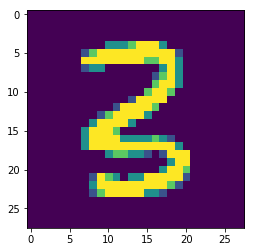

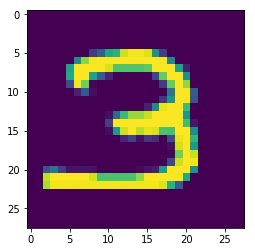

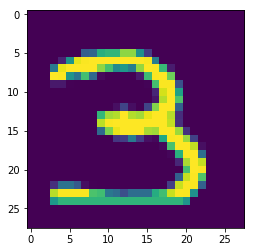

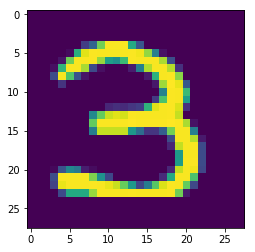

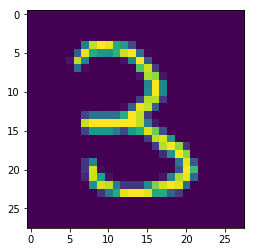

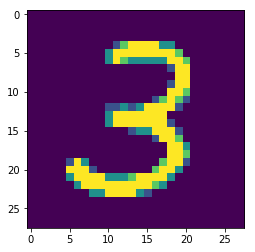

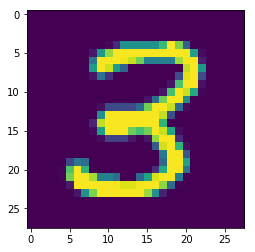

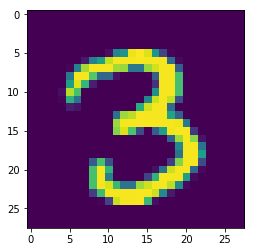

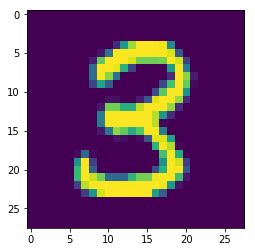

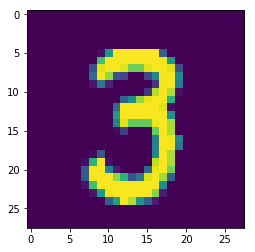

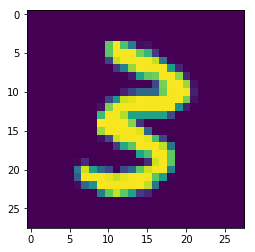

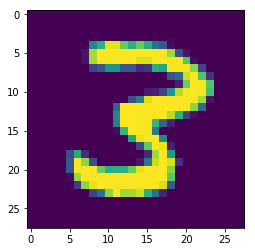

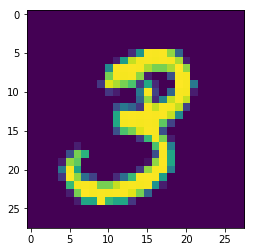

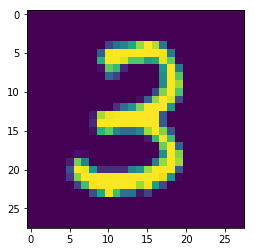

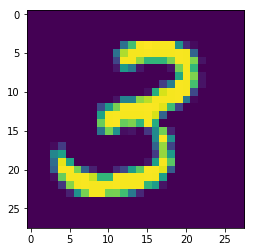

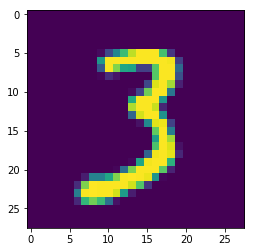

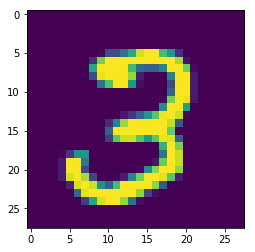

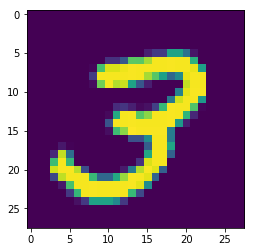

In [ ]:
import numpy as np
import matplotlib

avg=np.zeros((28,28))
for i,data in enumerate(mnist.data):
        im =data.reshape(28,28)
        if mnist['target'][i]==3:
            avg+=im
            i+=1
            avg/=i

            plt.figure()
            plt.imshow(avg)
            plt.show()

# Let's display some data :)

Now let's explore the data.

In [ ]:
# Display the number of samples 
print "(Number of samples, No. of pixels) = ", mnist.data.shape

# Display 9 number randomly selectly
for c in range(1, 10):
    subplot(3, 3,c)
    i = randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    axis("off")
    title("Label = {}".format(mnist.target[i]))
    imshow(im, cmap='gray')

# Split the data into training and testing data

In [ ]:
# Split the data into training and test data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)

# Which is same as 
# x_train = mnist.data[:split]
# y_train = mnist.target[:split]
# x_test = mnist.data[split:]
# y_test = mnist.target[split:]

# Prepare the classifier

In [ ]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Perform the predictions and display the results

In [ ]:
# Perform the predictions
clf.fit(x_train,y_train)
# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print "Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100)
# Cross validate the scores
from sklearn.metrics import classification_report
print "Classification Report \n {}".format(classification_report(y_test, y_predicted, labels=range(0,10)))